In [3]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, GRU, Input
from keras.models import Model
from keras.optimizers import RMSprop

#Import another jupyter notebook
import import_ipynb
from AttentionLayer import *
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [4]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [5]:
path = 'data/'
outputpath ='outputs/01_agru_samEval2018/'

In [6]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [7]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\twitter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [8]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Hyperparameter for all models

In [9]:
NUM_EPOCHS = 30
BATCH_SIZE = 64
softmax = True
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 0.0000001)
lossfunction ='binary_crossentropy'

Instructions for updating:
Colocations handled automatically by placer.


## AttentiveGRU one GRU-layer, 400 neurons

In [10]:
wv_layer = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#GRU Layer
x = GRU(400, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(embedded_sequences)

#Attention Layer
x = Attention()(x)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model1 = Model(inputs=[comment_input], outputs=preds)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


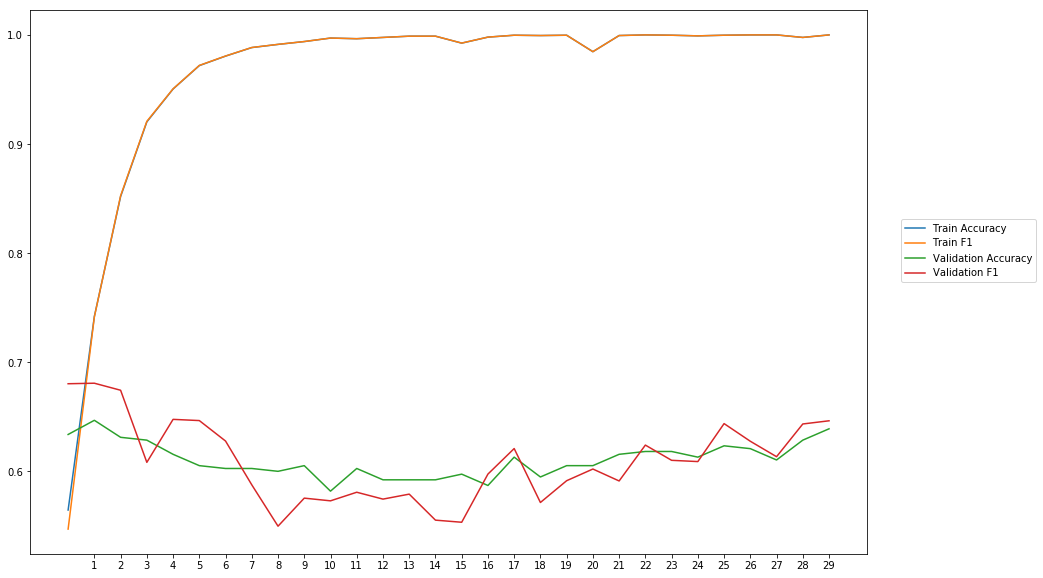

Average Accuracy: 61.07%
Average Precision: 61.25%
Average Recall: 61.19%
Average F1: 60.95%

-----Fold 2--------


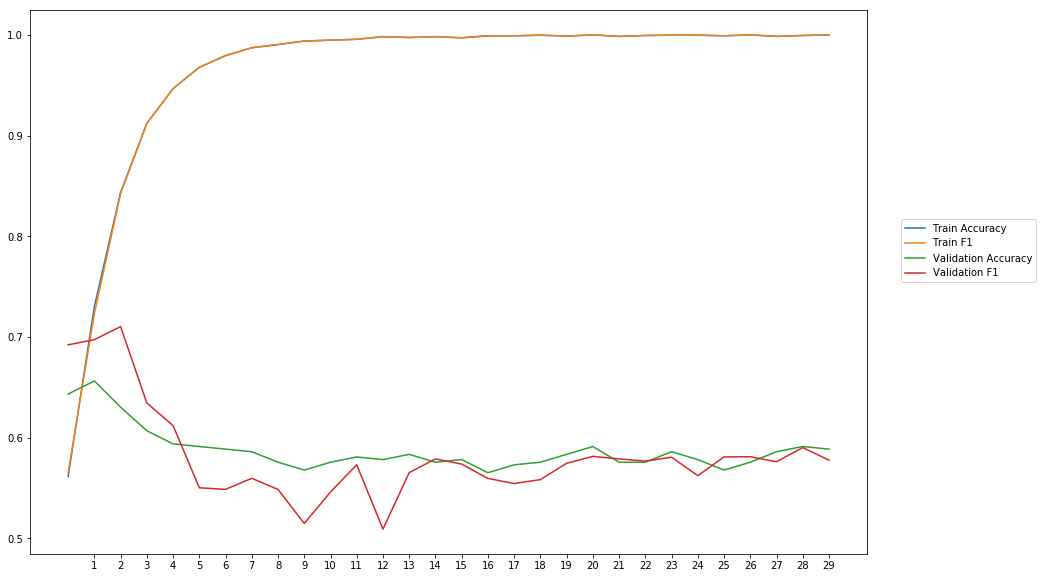

Average Accuracy: 58.74%
Average Precision: 59.16%
Average Recall: 57.88%
Average F1: 58.15%

-----Fold 3--------


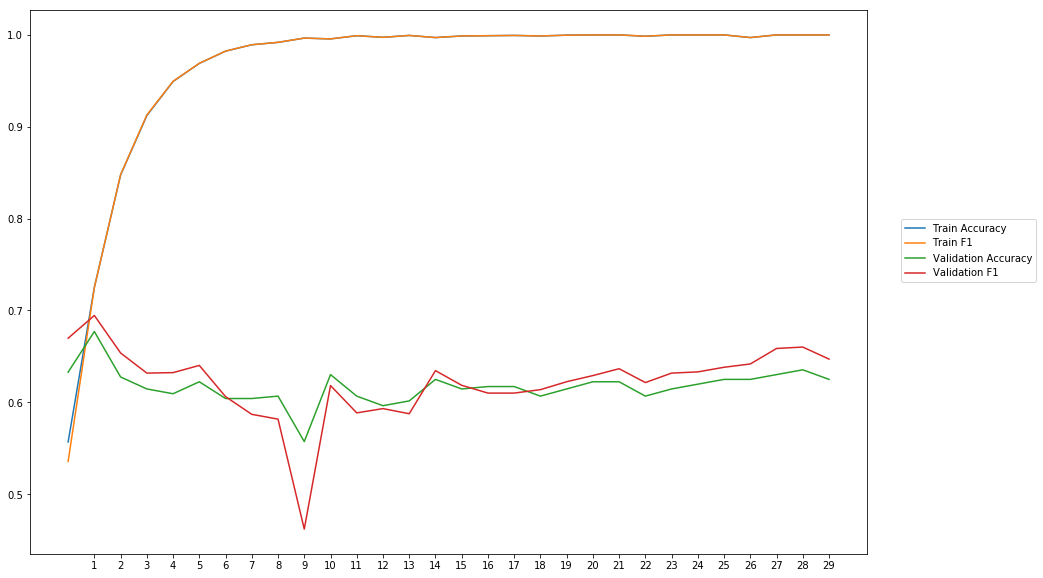

Average Accuracy: 61.71%
Average Precision: 61.60%
Average Recall: 63.16%
Average F1: 62.18%

-----Fold 4--------


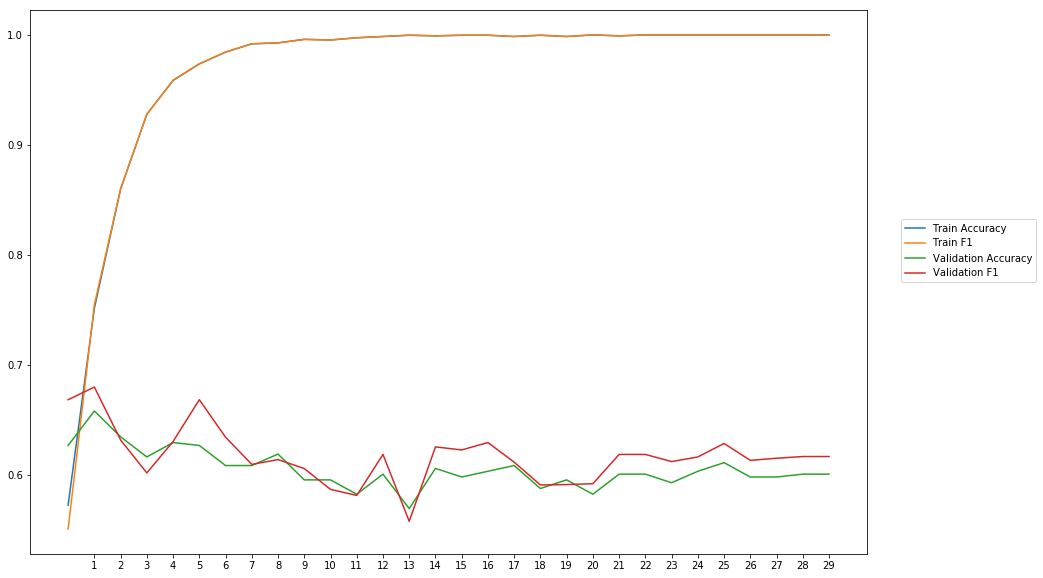

Average Accuracy: 60.51%
Average Precision: 60.04%
Average Recall: 63.58%
Average F1: 61.68%

-----Fold 5--------


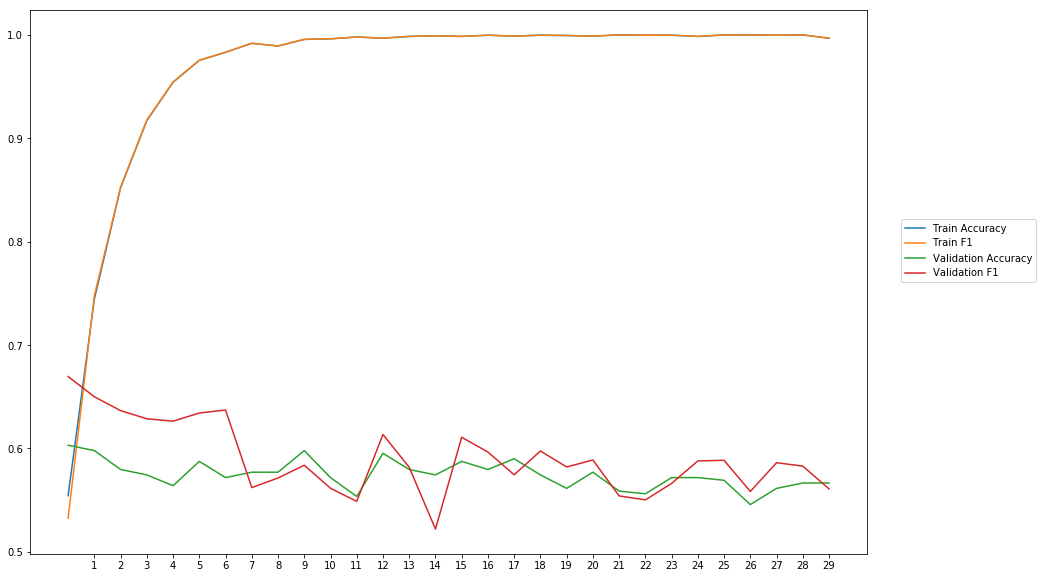

Average Accuracy: 57.48%
Average Precision: 57.10%
Average Recall: 61.72%
Average F1: 59.04%

-----Fold 6--------


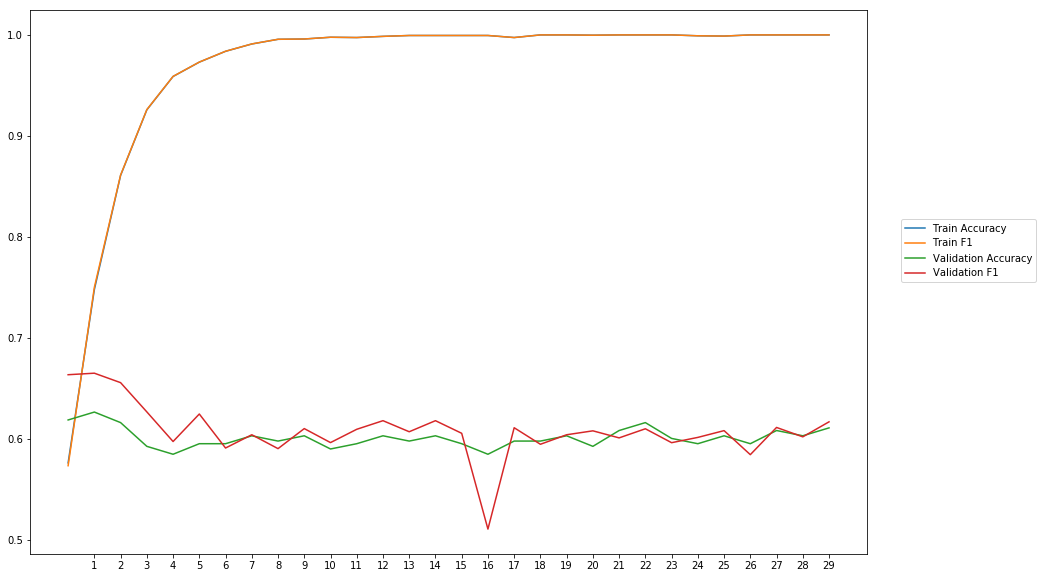

Average Accuracy: 60.12%
Average Precision: 59.93%
Average Recall: 62.07%
Average F1: 60.82%

-----Fold 7--------


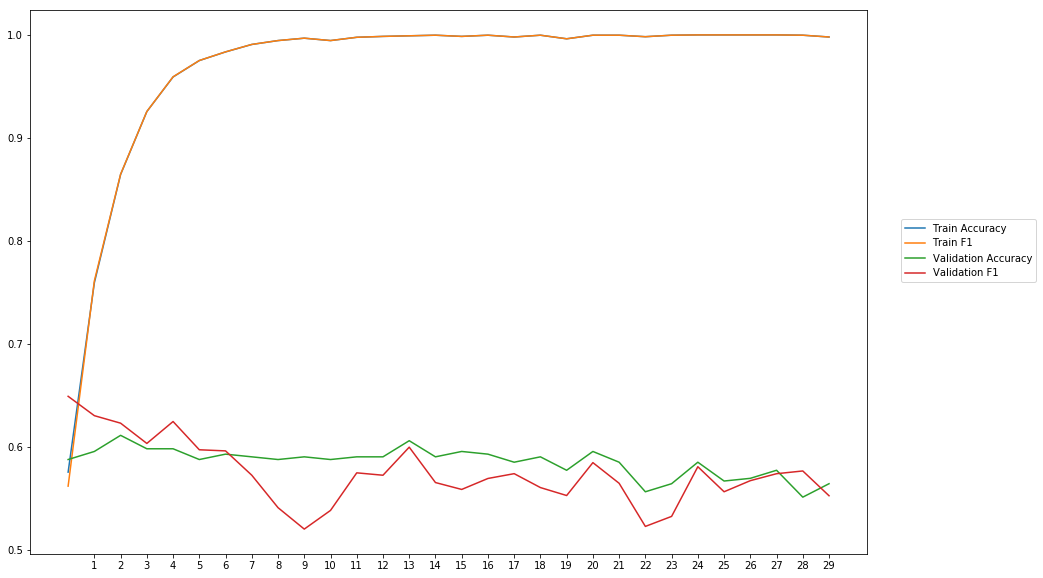

Average Accuracy: 58.51%
Average Precision: 59.19%
Average Recall: 56.22%
Average F1: 57.42%

-----Fold 8--------


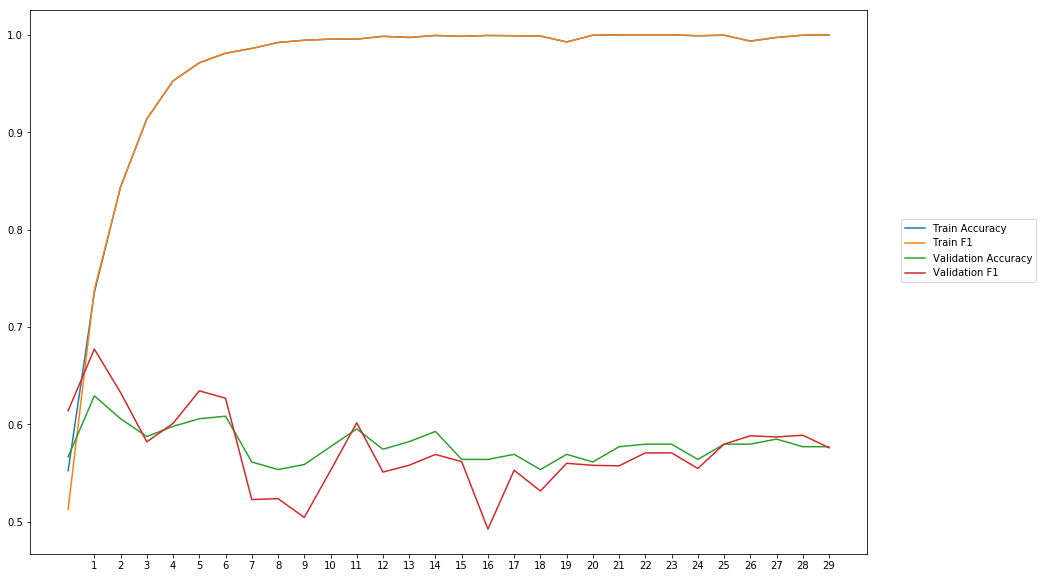

Average Accuracy: 57.92%
Average Precision: 58.22%
Average Recall: 56.77%
Average F1: 57.27%

-----Fold 9--------


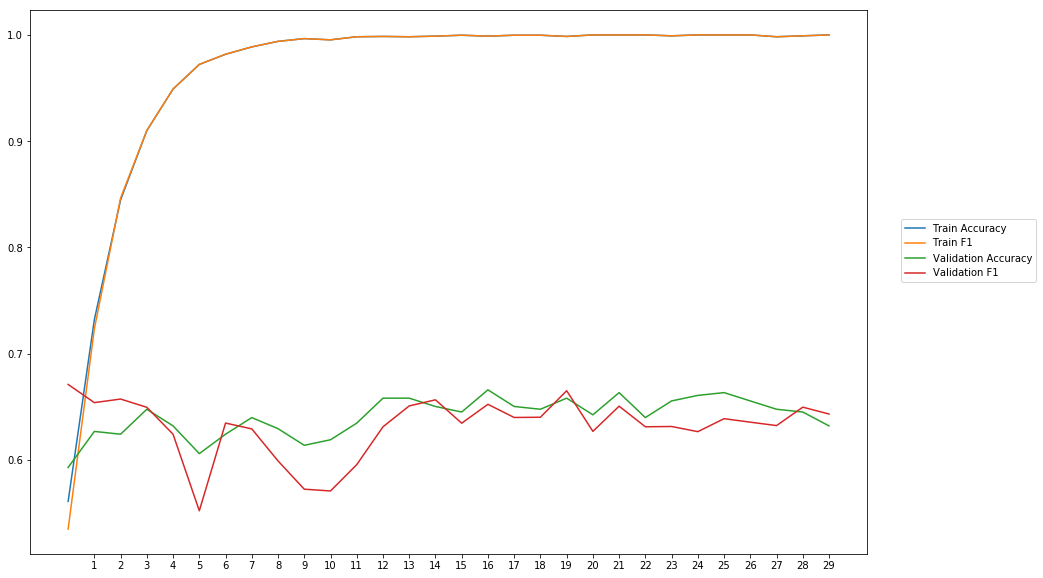

Average Accuracy: 64.08%
Average Precision: 65.23%
Average Recall: 61.74%
Average F1: 63.14%

-----Fold 10--------


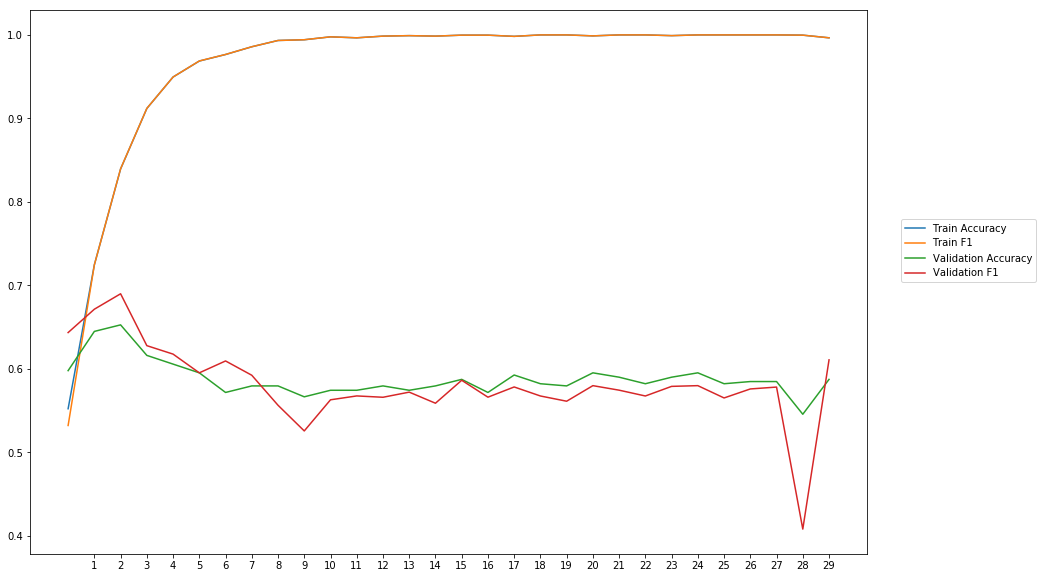

Average Accuracy: 58.82%
Average Precision: 59.12%
Average Recall: 57.71%
Average F1: 58.12%

-------Overallresults-------


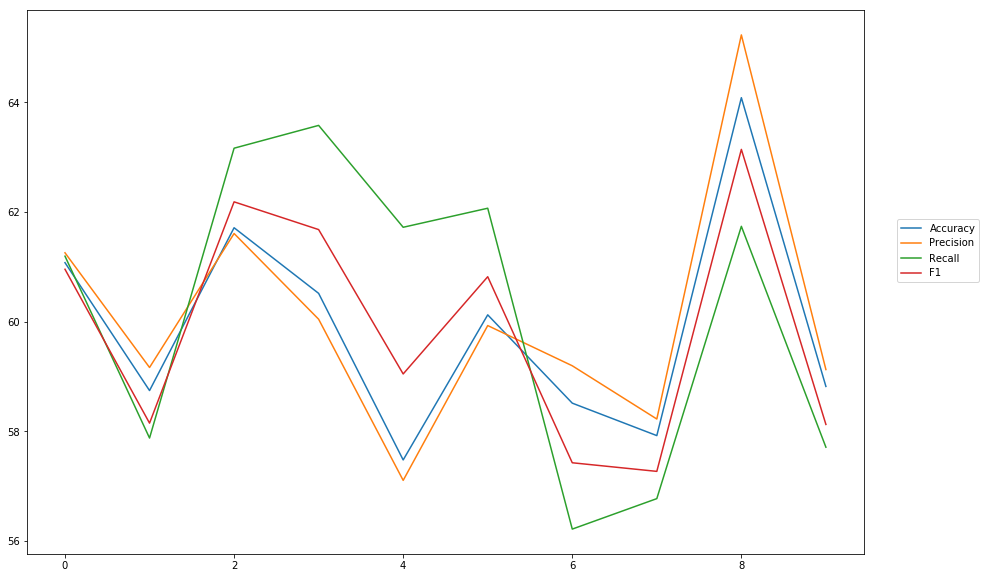

Accuracy: Mean = 59.90% (+/- 1.92%), Max = 64.08%, Min =  57.48%
Precision: Mean = 60.09% (+/- 2.12%), Max = 65.23%, Min =  57.10%
Recall: Mean = 60.20% (+/- 2.62%), Max = 63.58%, Min =  56.22%
F1: Mean = 59.88% (+/- 2.02%), Max = 63.14%, Min =  57.27%


In [8]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model1, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'gru_1_400_False')  

## AttentiveGRU two GRU-layers, each 400 neurons

In [ ]:
wv_layer3 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences3 = wv_layer3(comment_input3)

#Frist GRU Layer
x3 = GRU(400, activation='tanh', return_sequences=True, recurrent_activation='sigmoid')(embedded_sequences3)

#Second GRU Layer
x3 = GRU(400, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(x3)

#Attention Layer
x3 = Attention()(x3)

#Output (Dense) Layer
preds3 = Dense(2, activation='softmax')(x3)

# build the model
model3 = Model(inputs=[comment_input3], outputs=preds3)


-----Fold 1--------


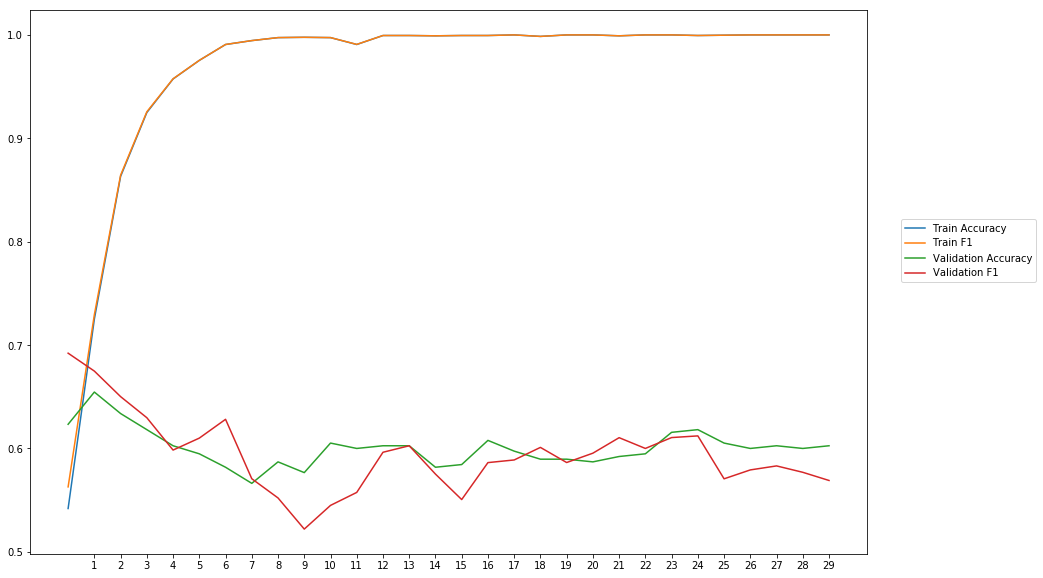

Average Accuracy: 60.06%
Average Precision: 60.57%
Average Recall: 58.88%
Average F1: 59.42%

-----Fold 2--------


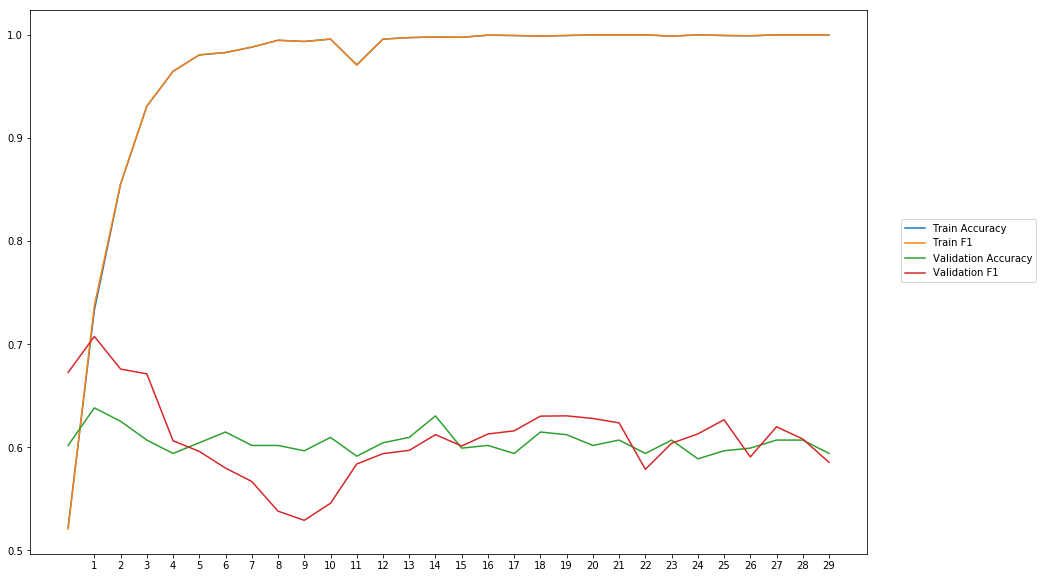

Average Accuracy: 60.49%
Average Precision: 60.77%
Average Recall: 61.83%
Average F1: 60.79%

-----Fold 3--------


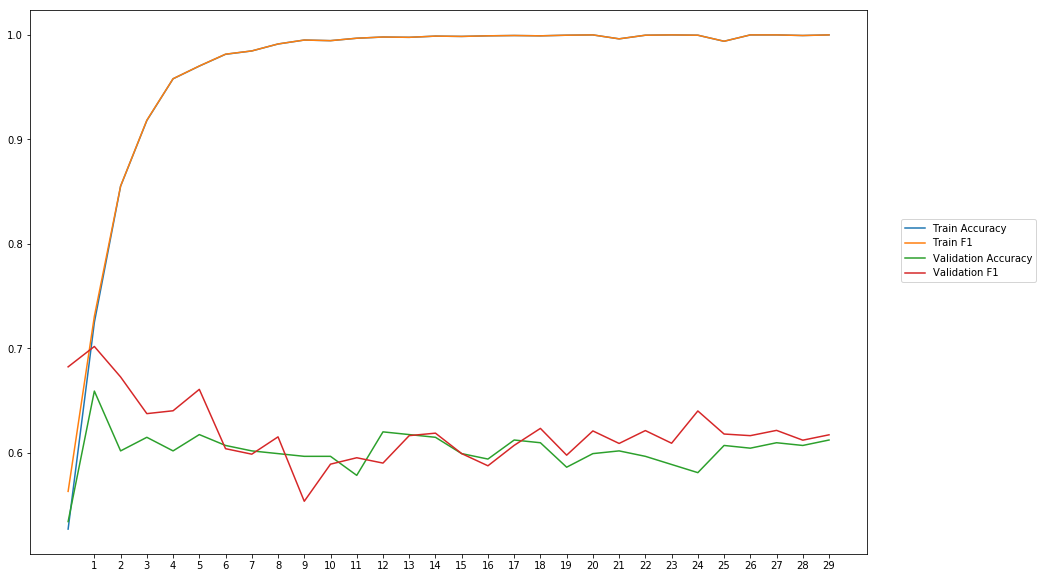

Average Accuracy: 60.21%
Average Precision: 59.88%
Average Recall: 64.94%
Average F1: 61.90%

-----Fold 4--------


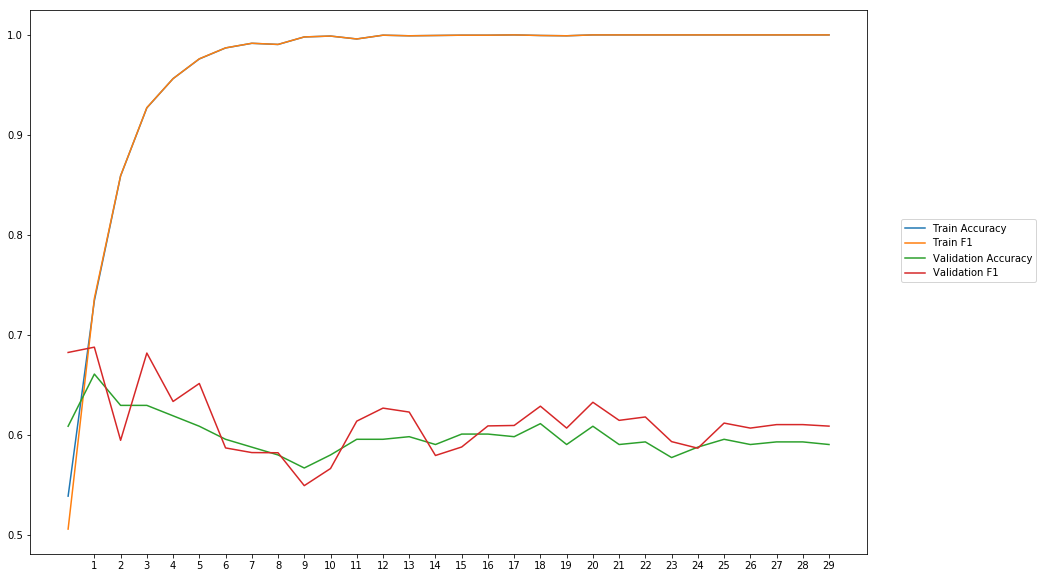

Average Accuracy: 59.86%
Average Precision: 59.34%
Average Recall: 63.65%
Average F1: 61.22%

-----Fold 5--------


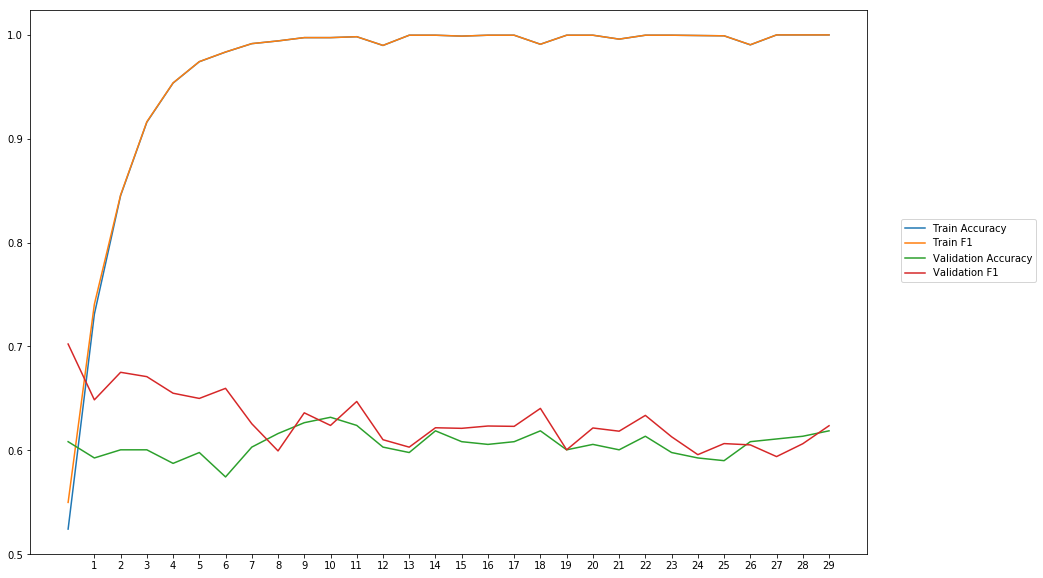

Average Accuracy: 60.59%
Average Precision: 59.77%
Average Recall: 67.08%
Average F1: 62.85%

-----Fold 6--------


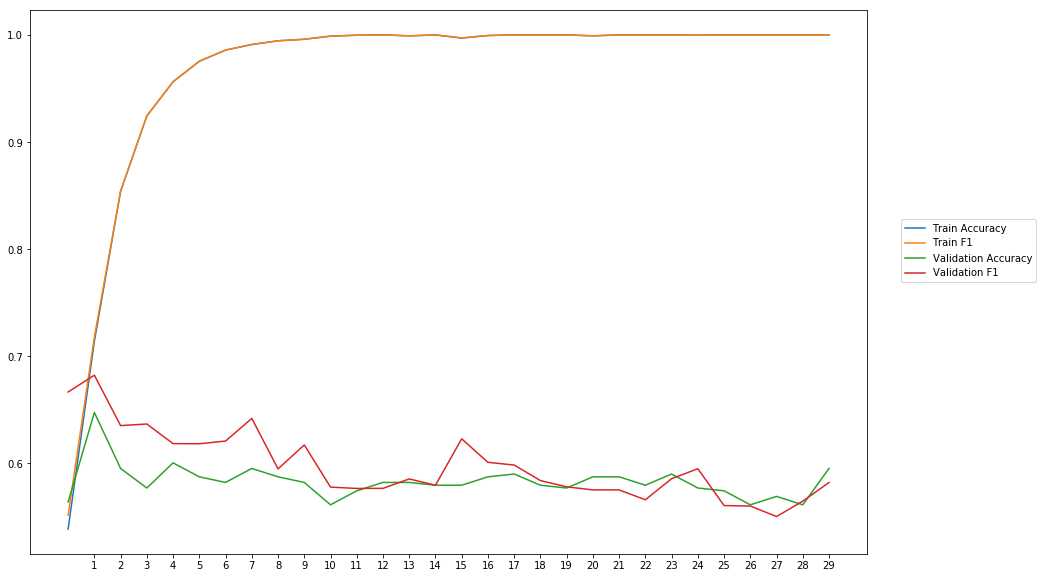

Average Accuracy: 58.32%
Average Precision: 57.93%
Average Recall: 62.26%
Average F1: 59.76%

-----Fold 7--------


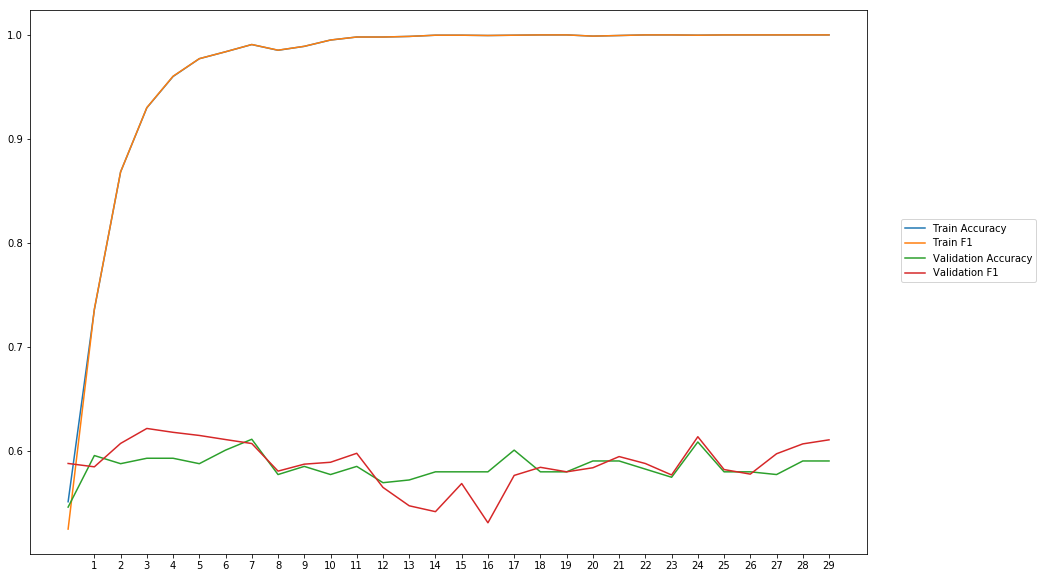

Average Accuracy: 58.46%
Average Precision: 58.54%
Average Recall: 59.20%
Average F1: 58.75%

-----Fold 8--------


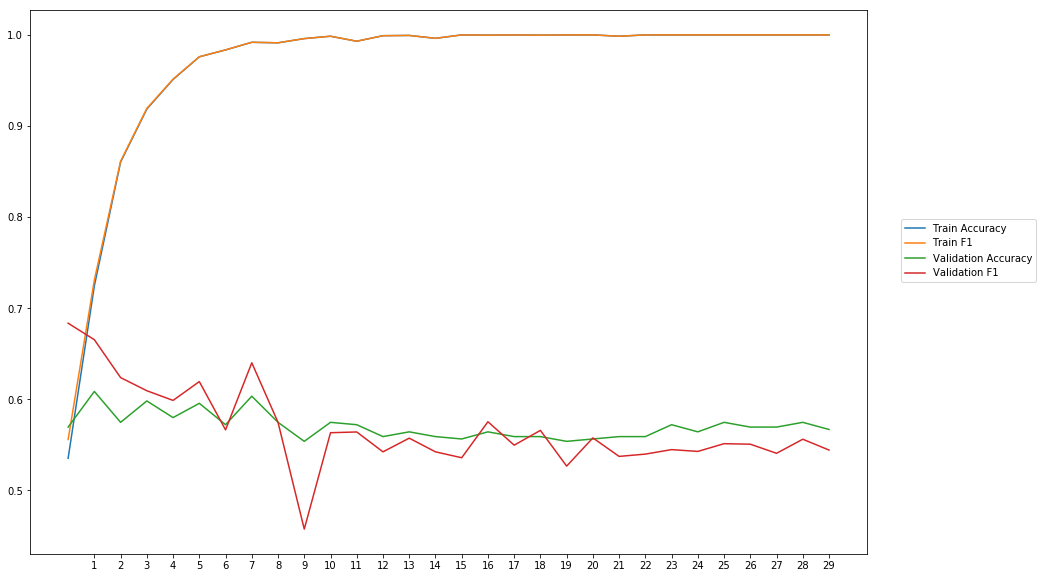

Average Accuracy: 57.03%
Average Precision: 57.23%
Average Recall: 57.07%
Average F1: 56.73%

-----Fold 9--------


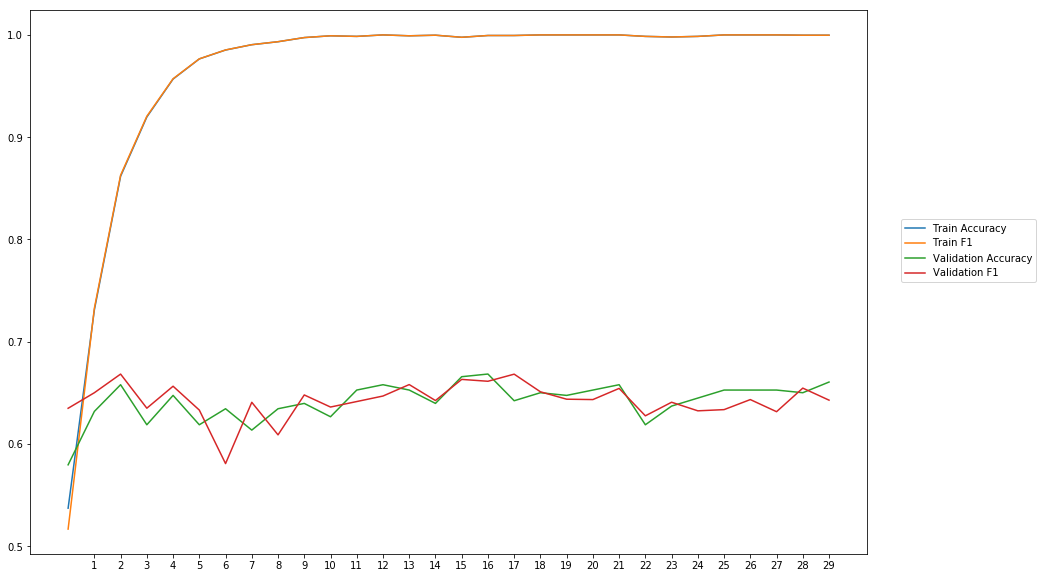

Average Accuracy: 64.20%
Average Precision: 64.55%
Average Recall: 64.27%
Average F1: 64.25%

-----Fold 10--------


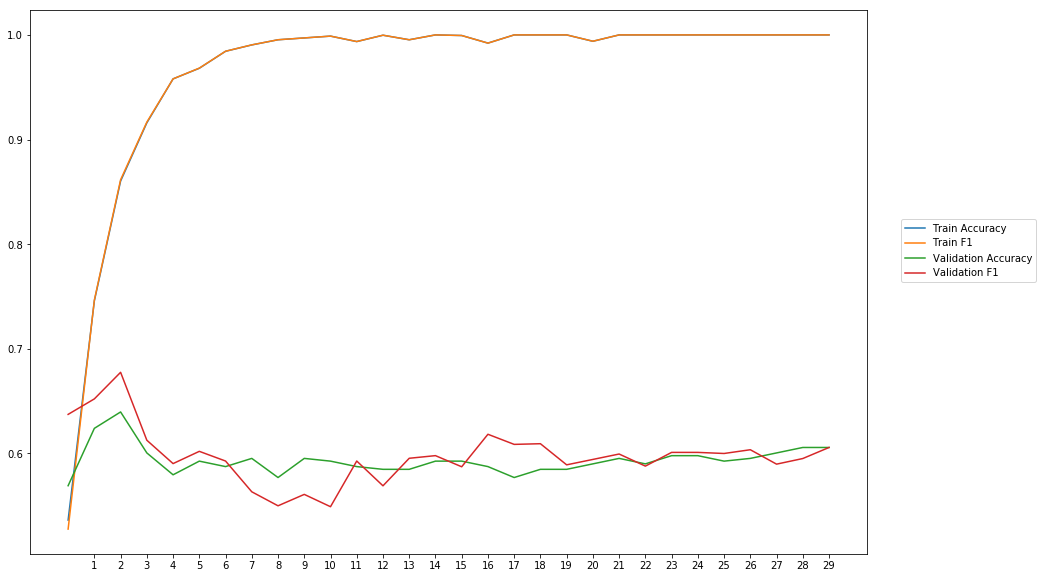

Average Accuracy: 59.34%
Average Precision: 59.33%
Average Recall: 60.61%
Average F1: 59.78%

-------Overallresults-------


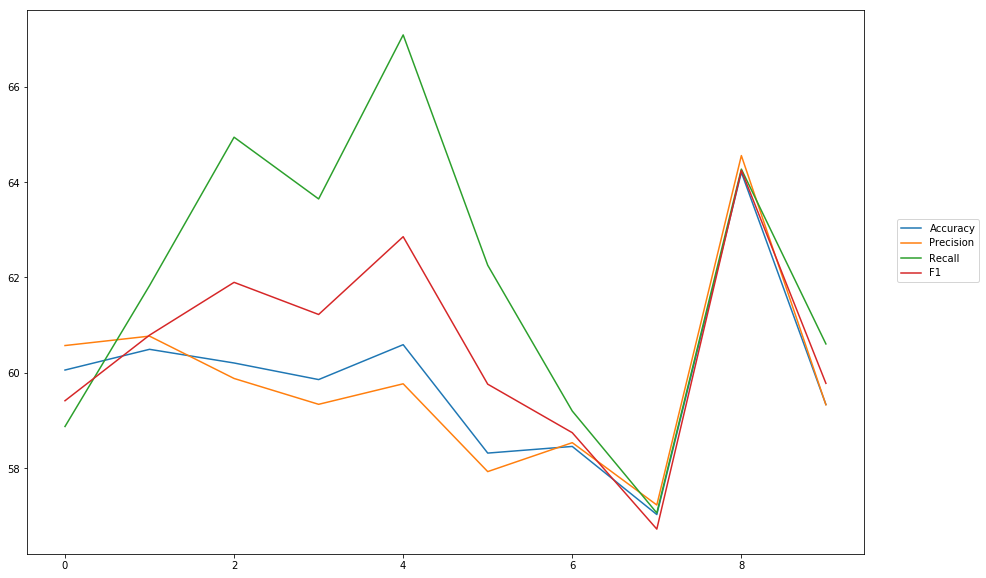

Accuracy: Mean = 59.86% (+/- 1.80%), Max = 64.20%, Min =  57.03%
Precision: Mean = 59.79% (+/- 1.90%), Max = 64.55%, Min =  57.23%
Recall: Mean = 61.98% (+/- 2.94%), Max = 67.08%, Min =  57.07%
F1: Mean = 60.55% (+/- 2.04%), Max = 64.25%, Min =  56.73%


In [22]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model3, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'gru_2_400_False_')  

## AttentiveGRU two GRU-layers, first 400 neurons, second 300 neurons

In [ ]:
wv_layer4 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences4 = wv_layer4(comment_input4)

#Frist GRU Layer
x4 = GRU(400, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(embedded_sequences4)

#Second GRU Layer
x4 = GRU(300, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(x4)

#Attention Layer
x4 = Attention()(x4)

#Output (Dense) Layer
preds4 = Dense(2, activation='softmax')(x4)

# build the model
model4 = Model(inputs=[comment_input4], outputs=preds4)


-----Fold 1--------


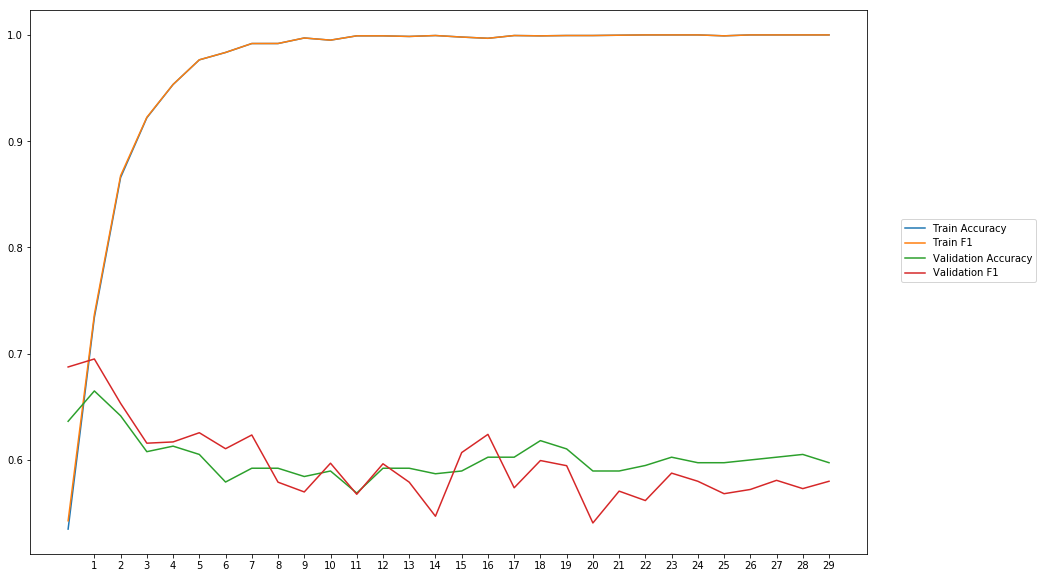

Average Accuracy: 60.16%
Average Precision: 60.58%
Average Recall: 59.10%
Average F1: 59.59%

-----Fold 2--------


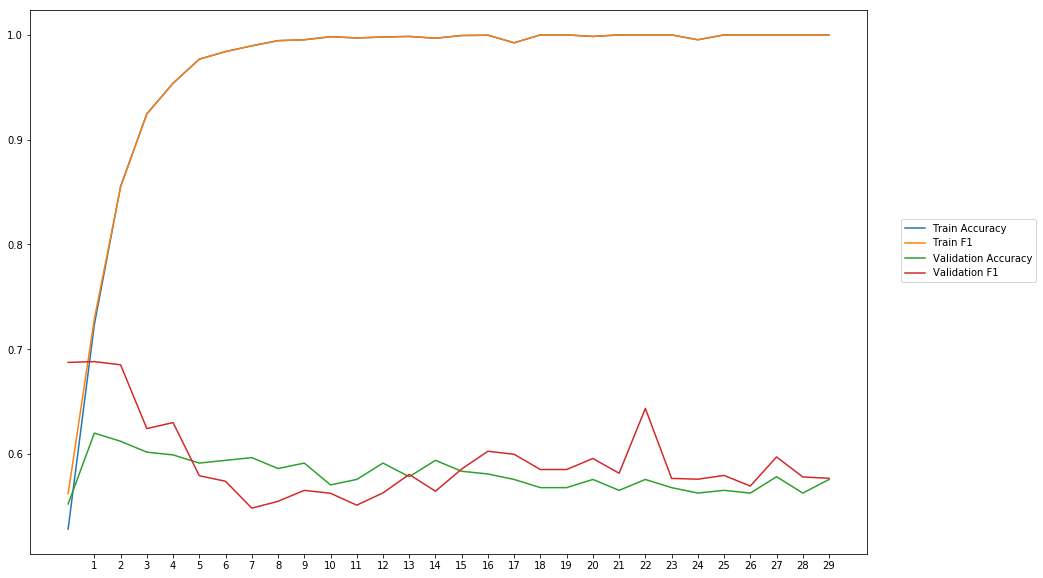

Average Accuracy: 58.06%
Average Precision: 58.02%
Average Recall: 61.68%
Average F1: 59.29%

-----Fold 3--------


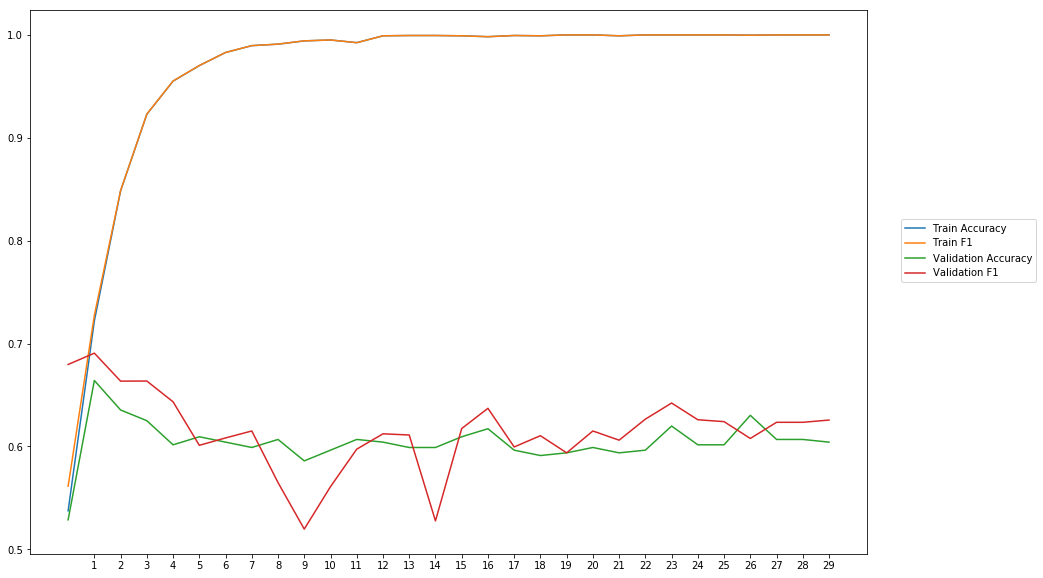

Average Accuracy: 60.44%
Average Precision: 60.45%
Average Recall: 63.54%
Average F1: 61.46%

-----Fold 4--------


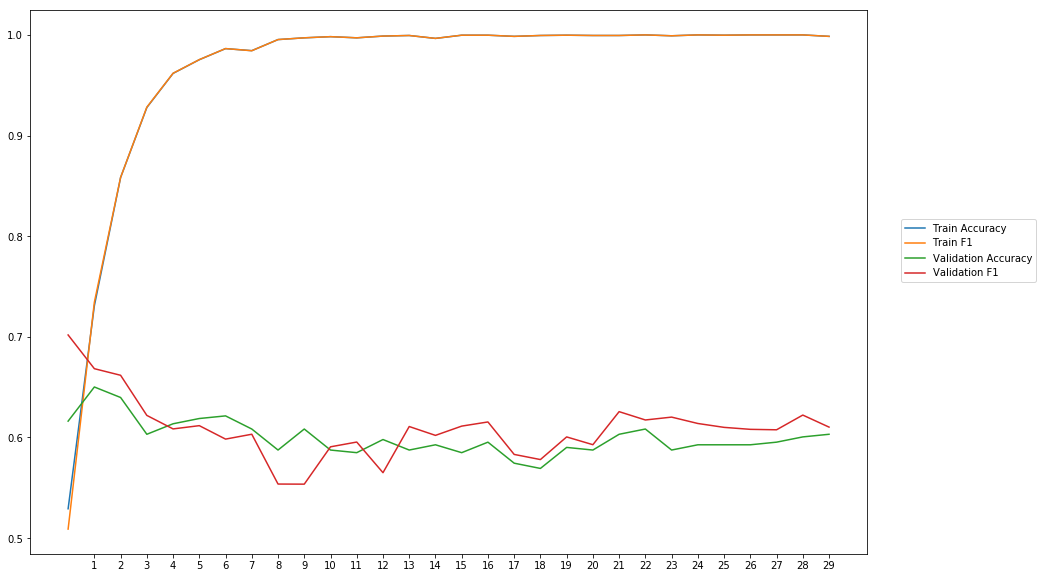

Average Accuracy: 59.98%
Average Precision: 59.76%
Average Recall: 62.53%
Average F1: 60.88%

-----Fold 5--------


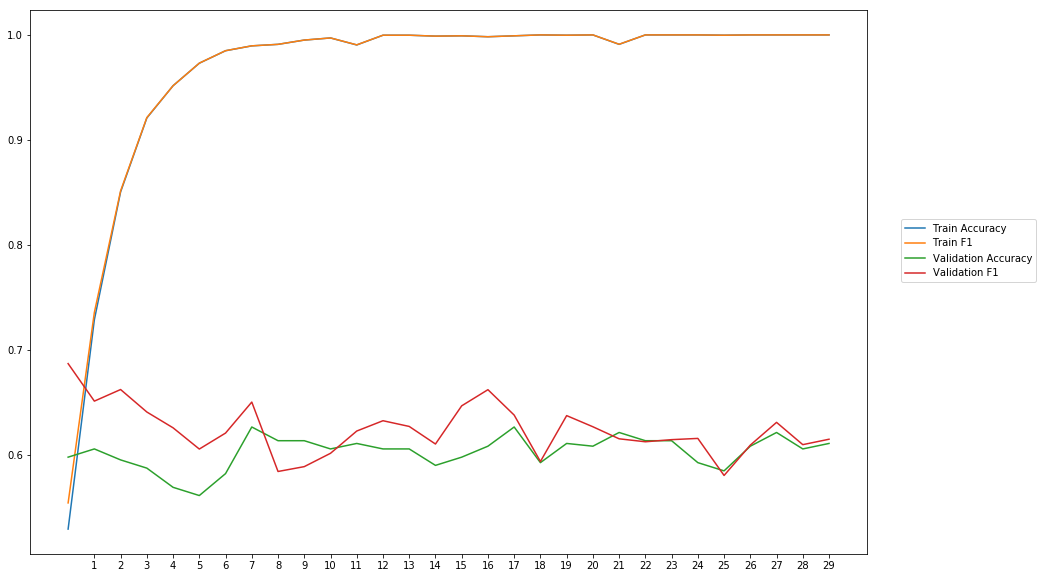

Average Accuracy: 60.30%
Average Precision: 59.58%
Average Recall: 66.15%
Average F1: 62.40%

-----Fold 6--------


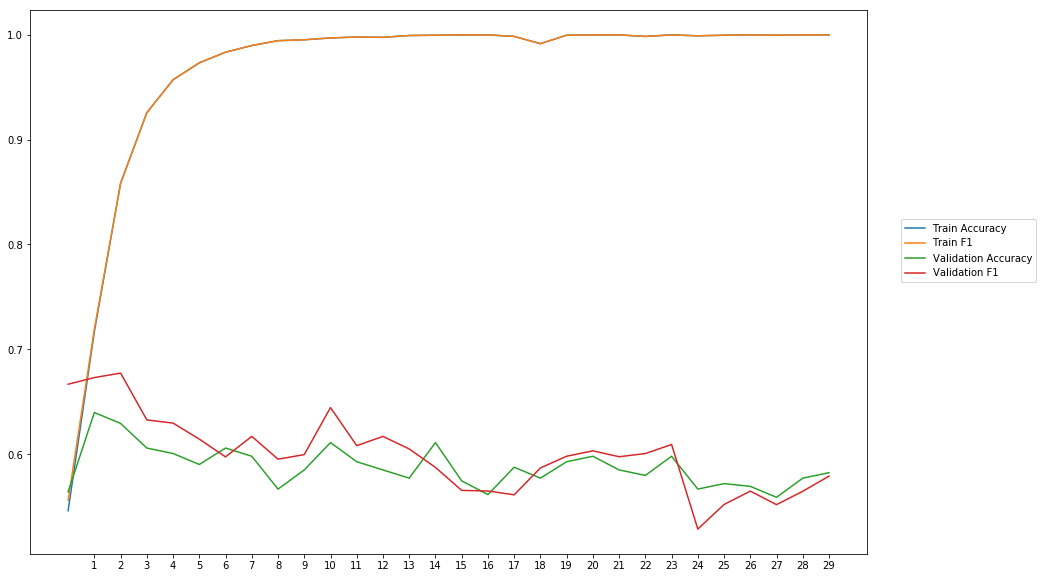

Average Accuracy: 58.80%
Average Precision: 58.45%
Average Recall: 62.10%
Average F1: 59.97%

-----Fold 7--------


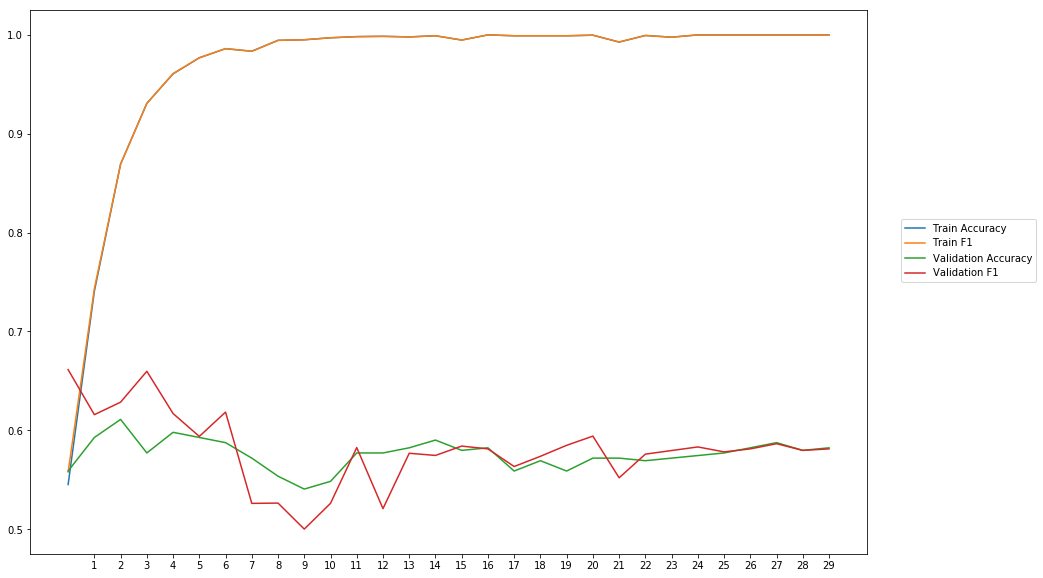

Average Accuracy: 57.58%
Average Precision: 57.60%
Average Recall: 59.10%
Average F1: 58.02%

-----Fold 8--------


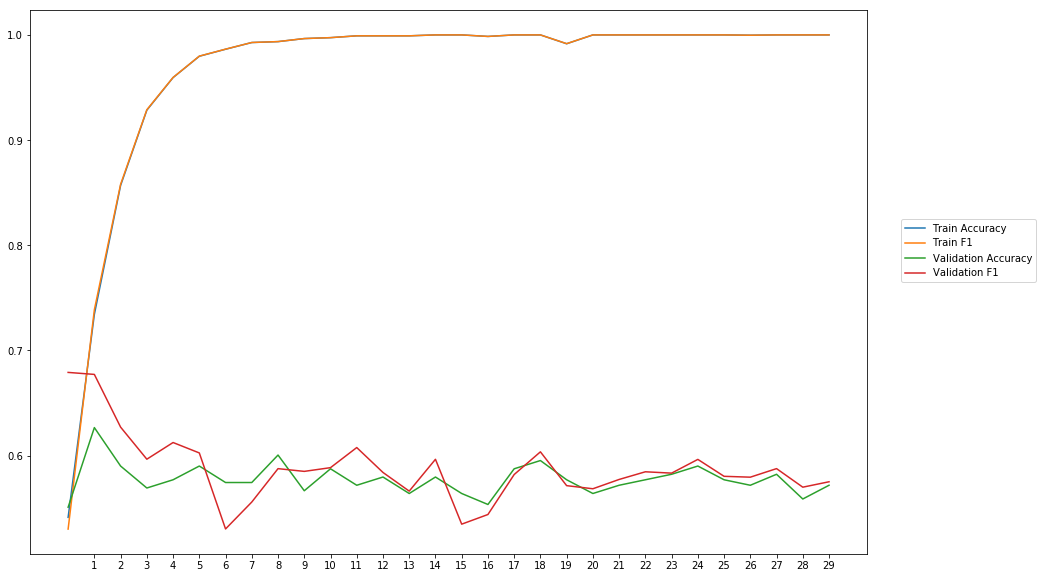

Average Accuracy: 57.75%
Average Precision: 57.58%
Average Recall: 60.66%
Average F1: 58.78%

-----Fold 9--------


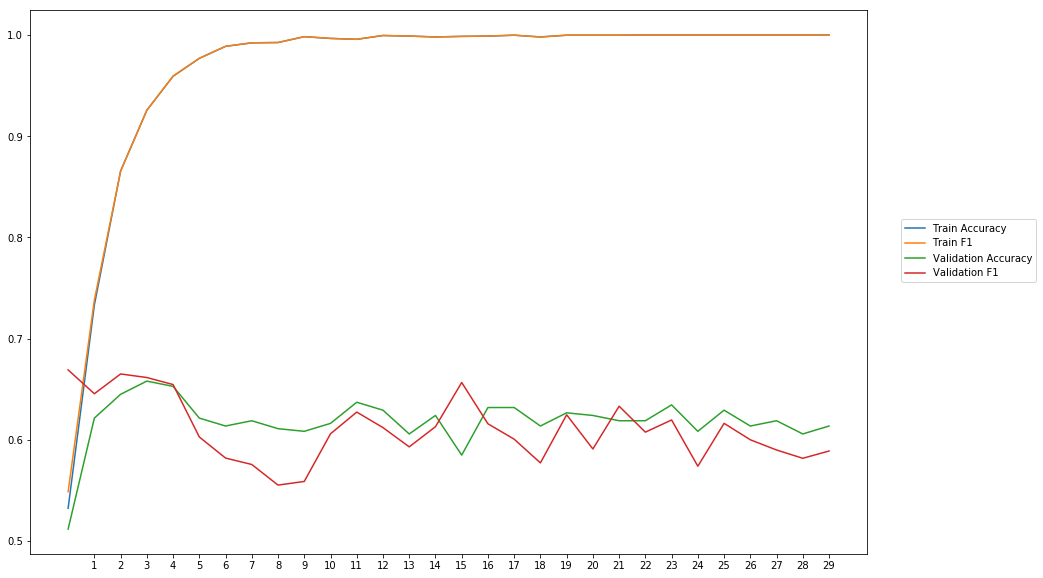

Average Accuracy: 61.83%
Average Precision: 62.97%
Average Recall: 60.17%
Average F1: 60.99%

-----Fold 10--------


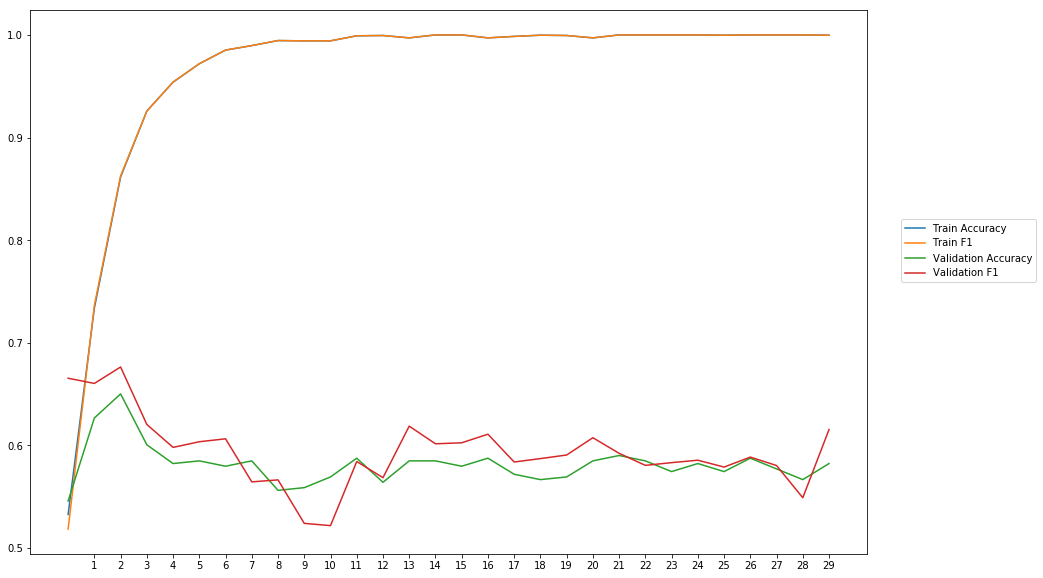

Average Accuracy: 58.13%
Average Precision: 57.82%
Average Recall: 61.56%
Average F1: 59.38%

-------Overallresults-------


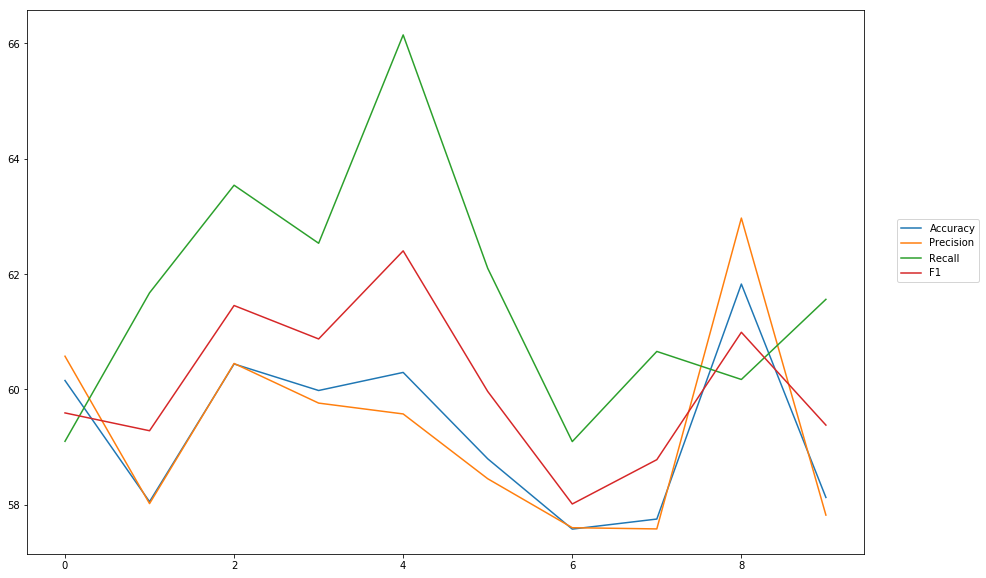

Accuracy: Mean = 59.30% (+/- 1.36%), Max = 61.83%, Min =  57.58%
Precision: Mean = 59.28% (+/- 1.65%), Max = 62.97%, Min =  57.58%
Recall: Mean = 61.66% (+/- 2.02%), Max = 66.15%, Min =  59.10%
F1: Mean = 60.08% (+/- 1.27%), Max = 62.40%, Min =  58.02%


In [11]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model4, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'gru_2_400_300_False')  

## AttentiveGRU one GRU-layer, 500 neurons

In [ ]:
wv_layer7 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input7 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences7 = wv_layer7(comment_input7)

#GRU Layer
x7 = GRU(500, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(embedded_sequences7)

#Attention Layer
x7 = Attention()(x7)

#Output (Dense) Layer
preds7 = Dense(2, activation='softmax')(x7)

# build the model
model7 = Model(inputs=[comment_input7], outputs=preds7)


-----Fold 1--------


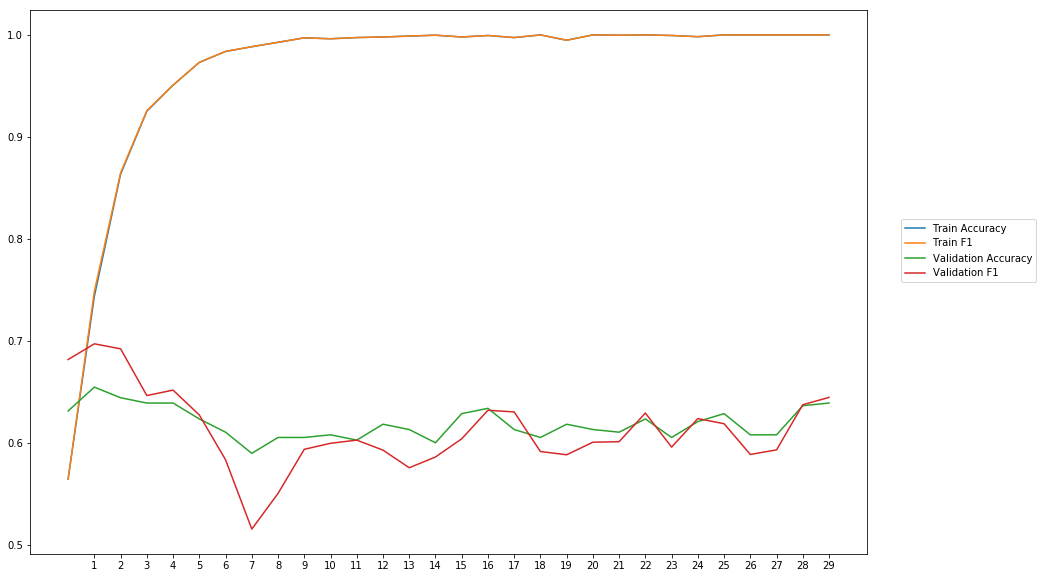

Average Accuracy: 61.91%
Average Precision: 62.43%
Average Recall: 60.67%
Average F1: 61.24%

-----Fold 2--------


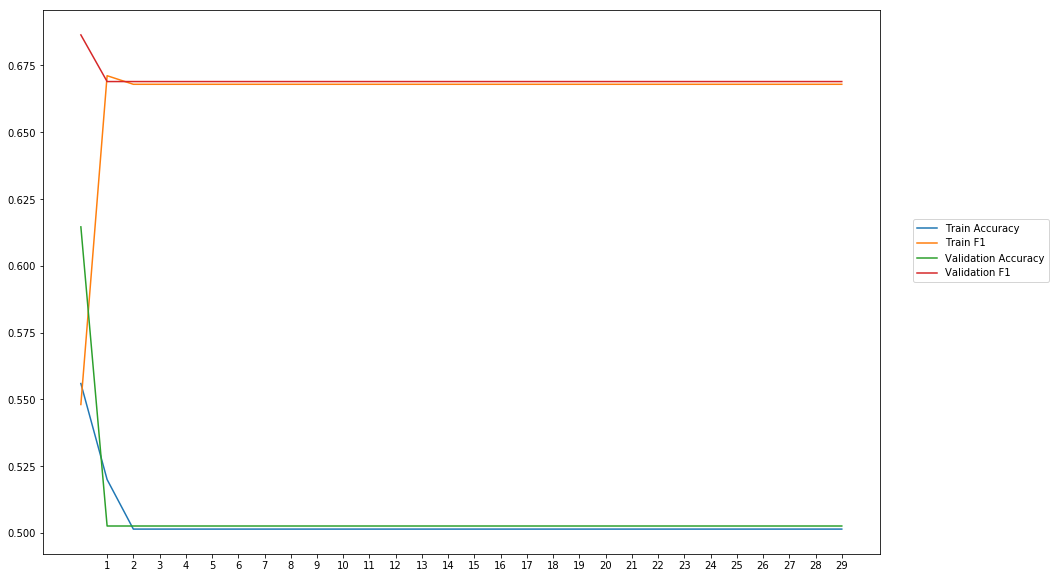

Average Accuracy: 50.63%
Average Precision: 50.52%
Average Recall: 99.46%
Average F1: 66.96%

-----Fold 3--------


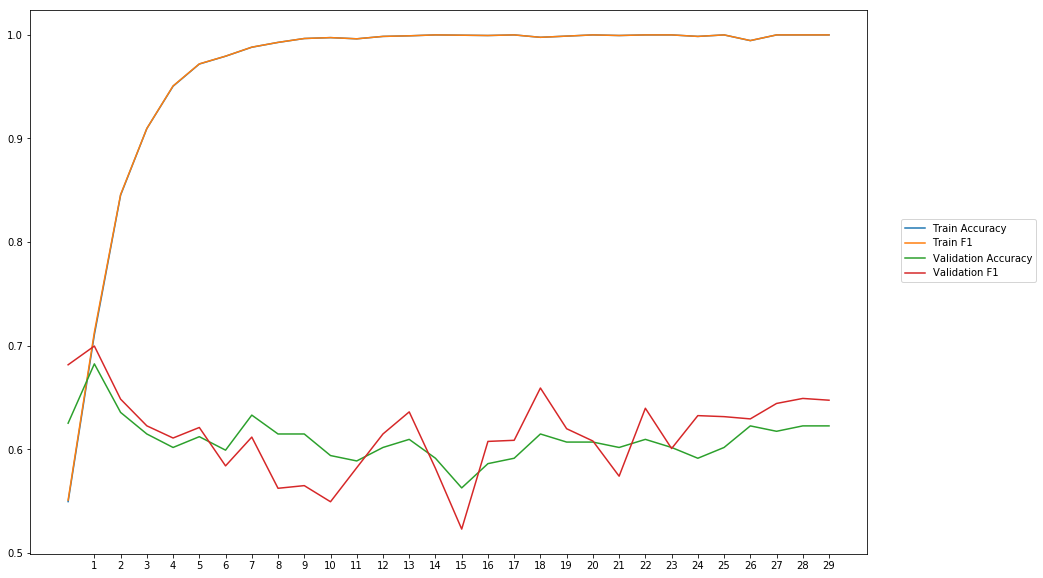

Average Accuracy: 60.91%
Average Precision: 60.94%
Average Recall: 62.63%
Average F1: 61.47%

-----Fold 4--------


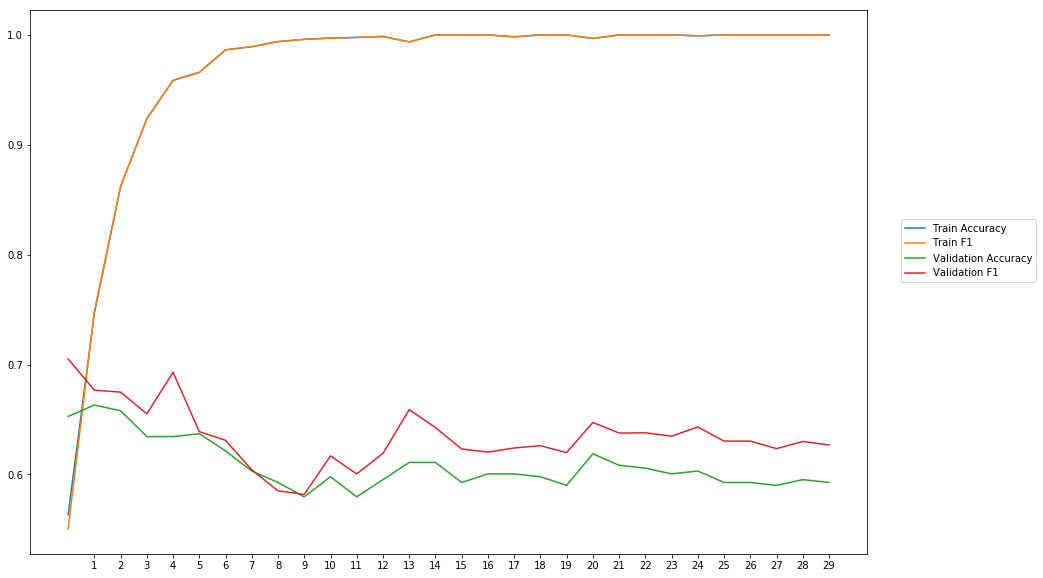

Average Accuracy: 60.84%
Average Precision: 59.62%
Average Recall: 68.07%
Average F1: 63.47%

-----Fold 5--------


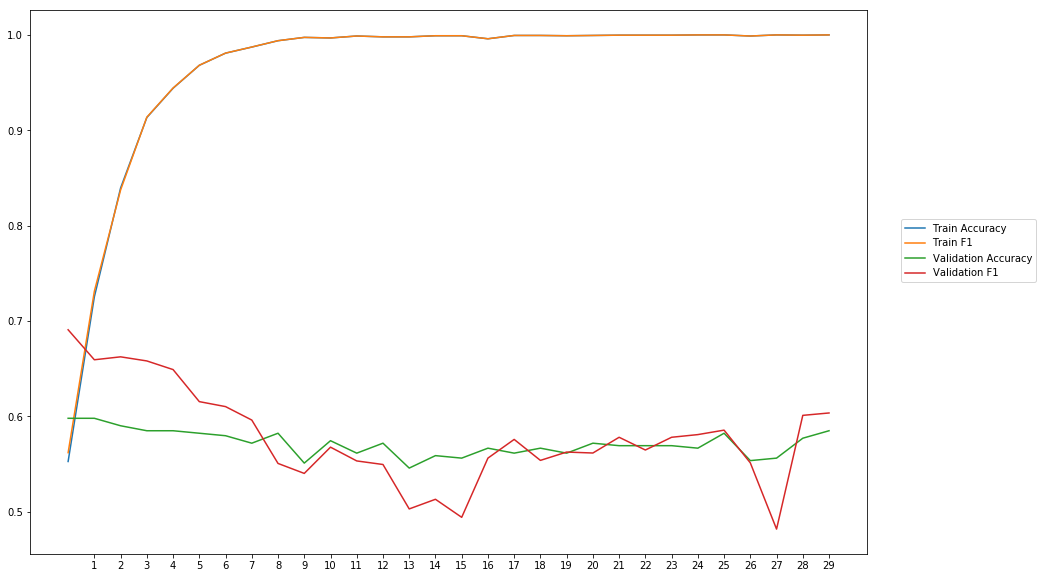

Average Accuracy: 57.15%
Average Precision: 56.99%
Average Recall: 59.76%
Average F1: 57.82%

-----Fold 6--------


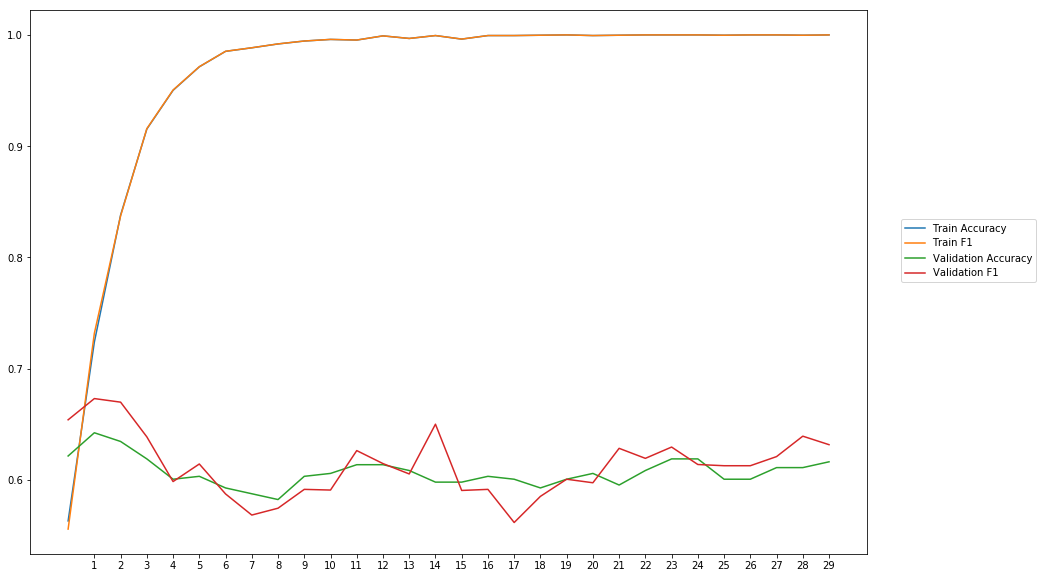

Average Accuracy: 60.69%
Average Precision: 60.49%
Average Recall: 62.45%
Average F1: 61.30%

-----Fold 7--------


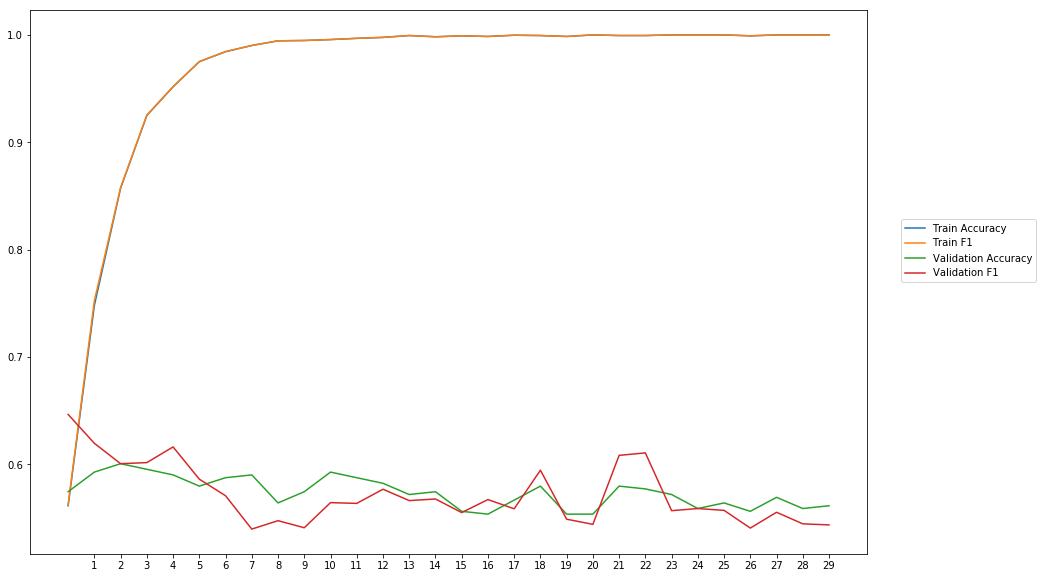

Average Accuracy: 57.39%
Average Precision: 57.66%
Average Recall: 57.05%
Average F1: 57.17%

-----Fold 8--------


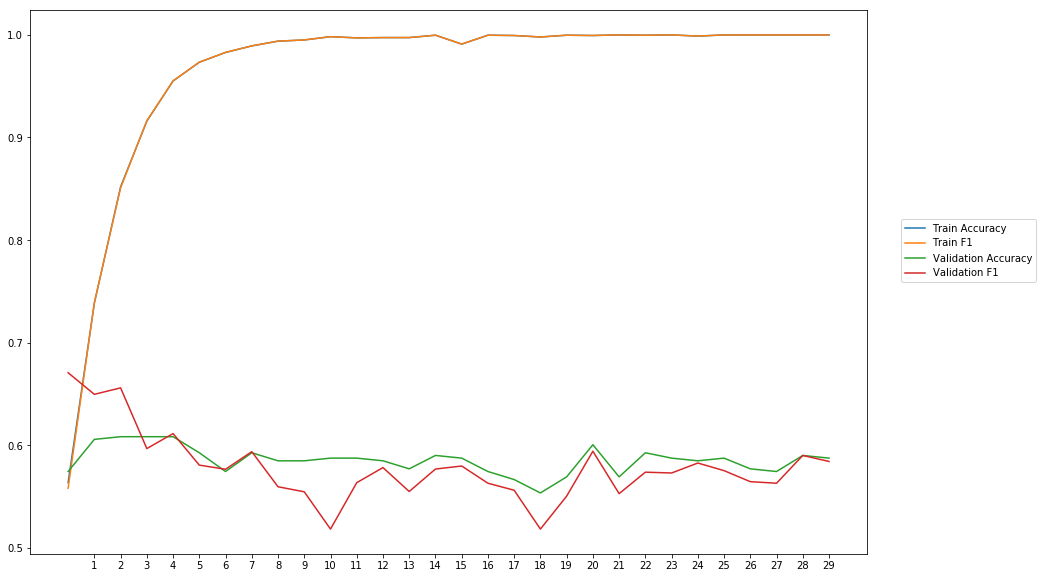

Average Accuracy: 58.55%
Average Precision: 59.01%
Average Recall: 57.34%
Average F1: 57.88%

-----Fold 9--------


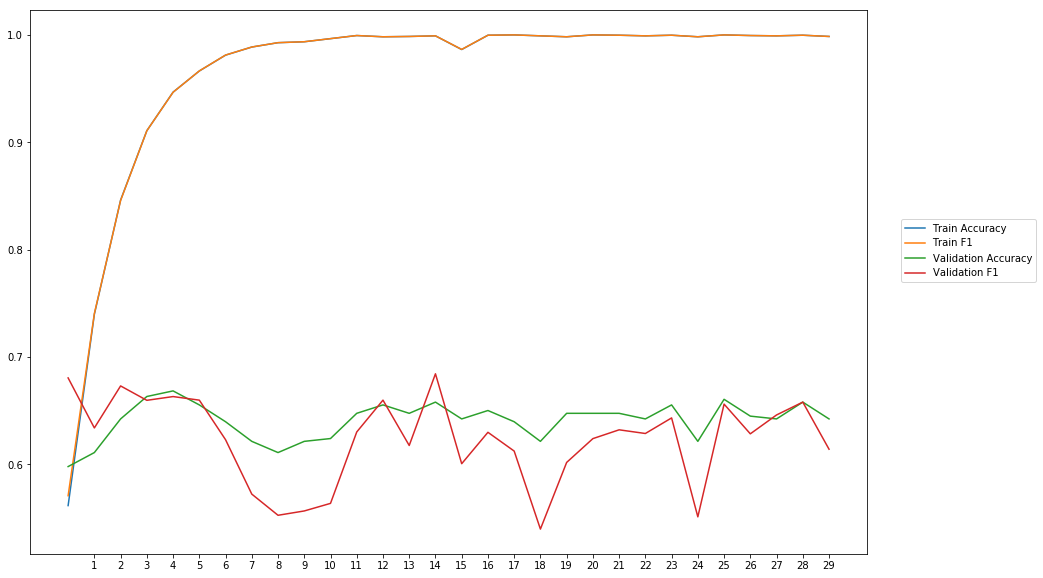

Average Accuracy: 64.09%
Average Precision: 65.89%
Average Recall: 60.02%
Average F1: 62.32%

-----Fold 10--------


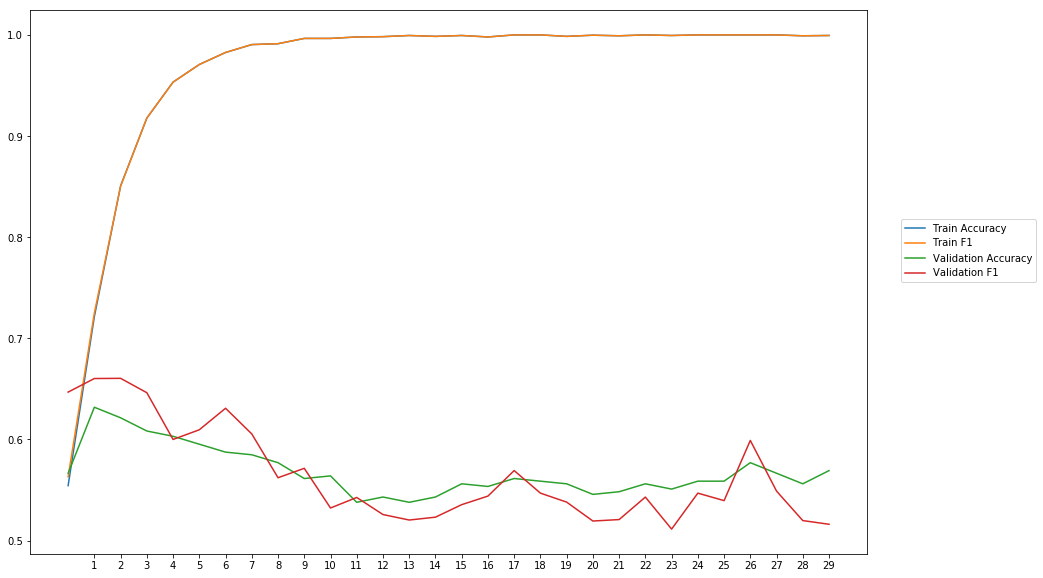

Average Accuracy: 56.79%
Average Precision: 56.89%
Average Recall: 56.56%
Average F1: 56.45%

-------Overallresults-------


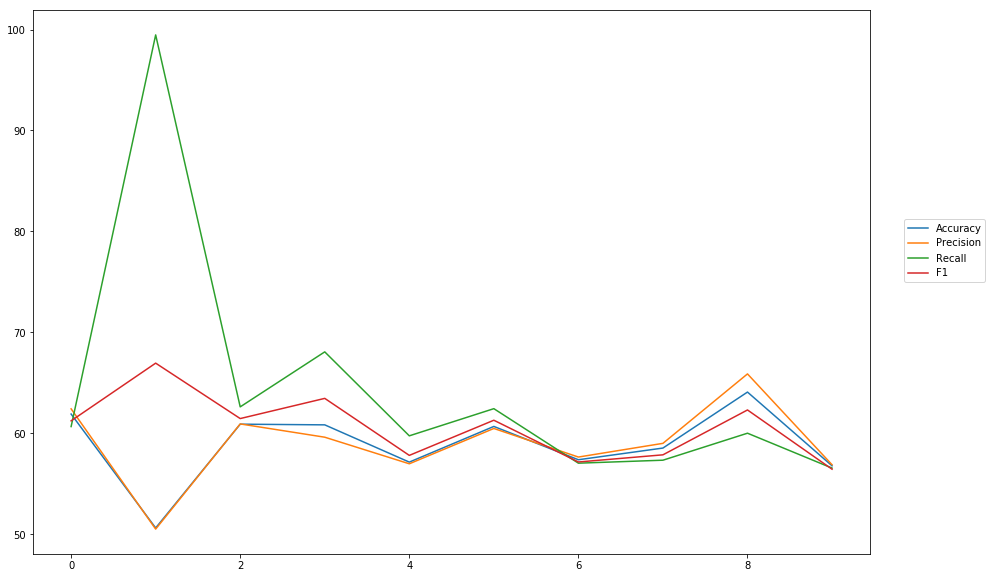

Accuracy: Mean = 58.90% (+/- 3.54%), Max = 64.09%, Min =  50.63%
Precision: Mean = 59.04% (+/- 3.84%), Max = 65.89%, Min =  50.52%
Recall: Mean = 64.40% (+/- 12.12%), Max = 99.46%, Min =  56.56%
F1: Mean = 60.61% (+/- 3.12%), Max = 66.96%, Min =  56.45%


In [15]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model7, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'gru_1_500_False')  

## AttentiveGRU one GRU-layer 300 neurons

In [ ]:
wv_layer8 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input8 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences8 = wv_layer8(comment_input8)

#GRU Layer
x8 = GRU(300, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(embedded_sequences8)

#Attention Layer
x8 = Attention()(x8)

#Output (Dense) Layer
preds8 = Dense(2, activation='softmax')(x8)

# build the model
model8 = Model(inputs=[comment_input8], outputs=preds8)


-----Fold 1--------


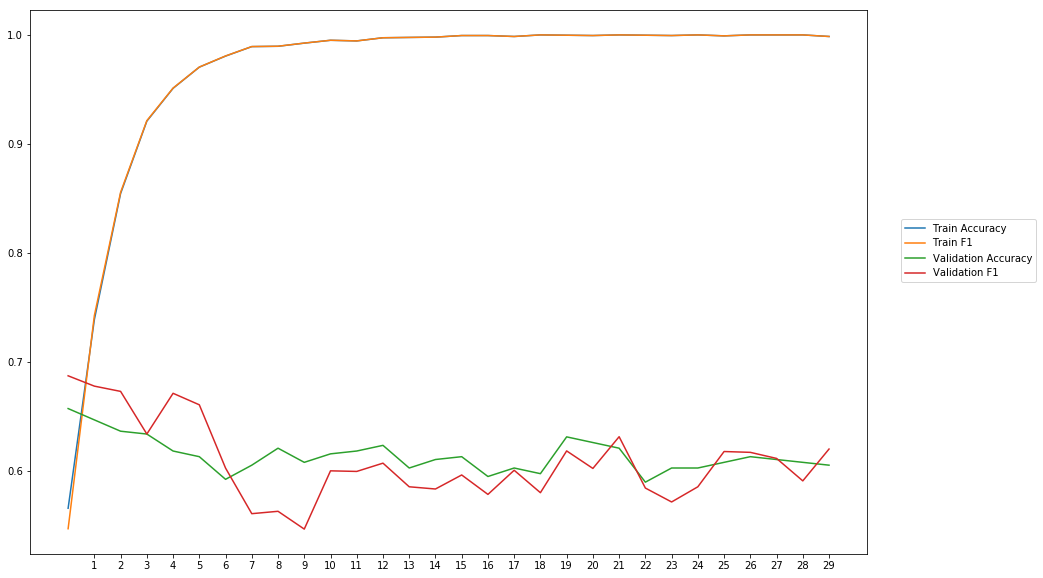

Average Accuracy: 61.42%
Average Precision: 61.95%
Average Recall: 60.41%
Average F1: 60.85%

-----Fold 2--------


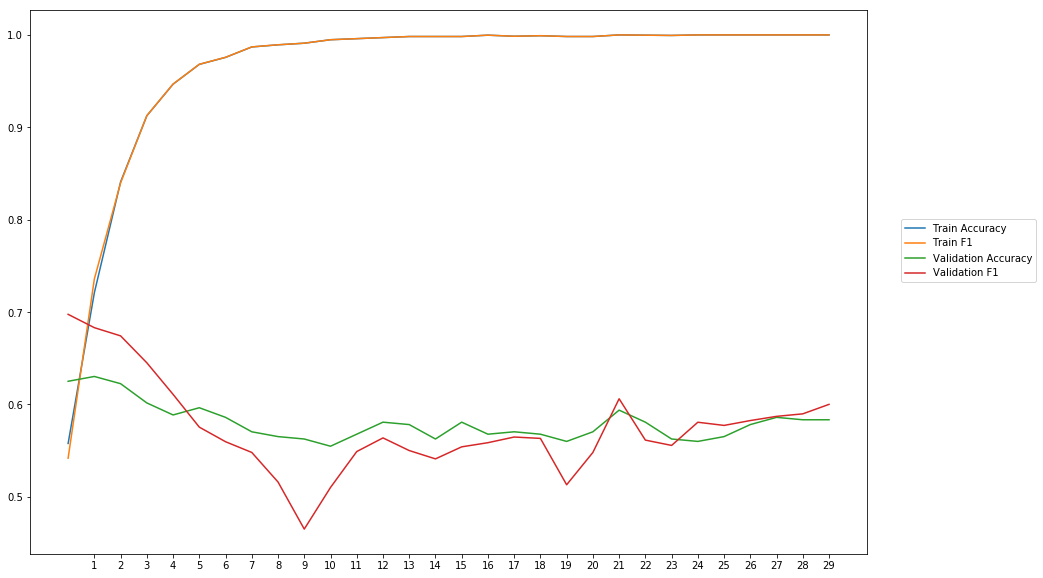

Average Accuracy: 58.00%
Average Precision: 58.38%
Average Recall: 57.34%
Average F1: 57.43%

-----Fold 3--------


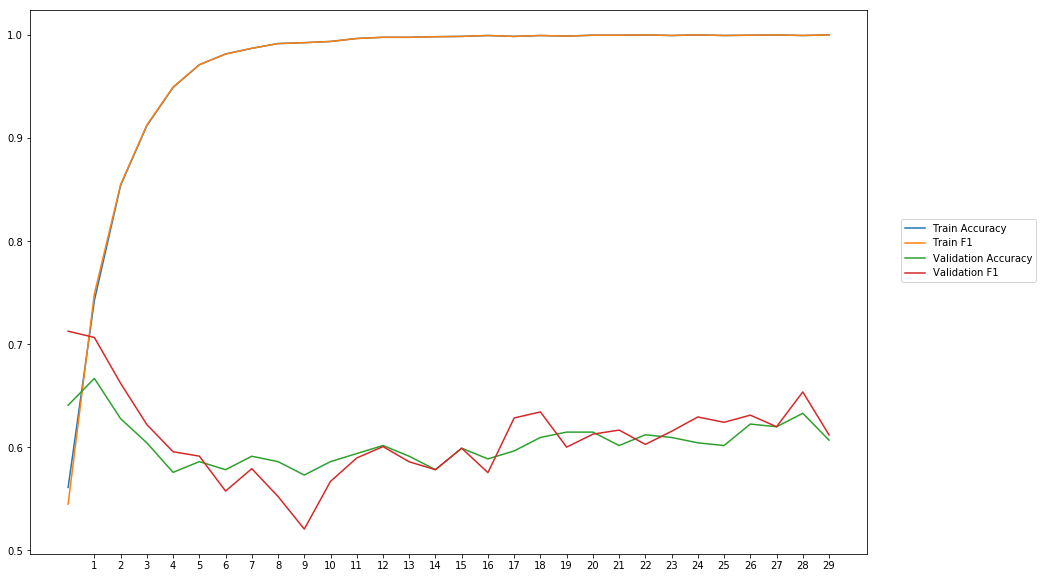

Average Accuracy: 60.37%
Average Precision: 60.28%
Average Recall: 62.06%
Average F1: 60.91%

-----Fold 4--------


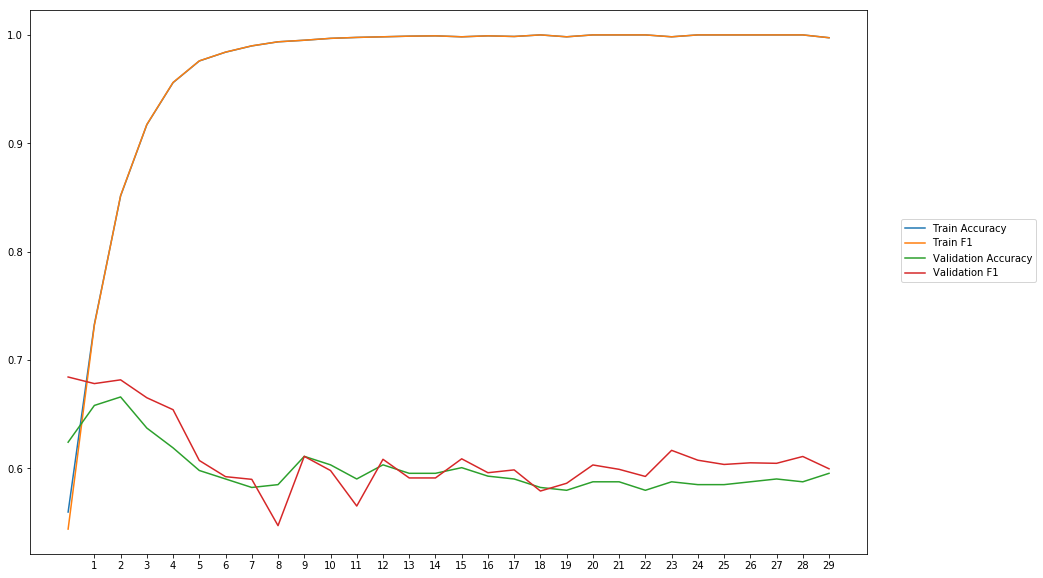

Average Accuracy: 59.91%
Average Precision: 59.53%
Average Recall: 62.62%
Average F1: 60.91%

-----Fold 5--------


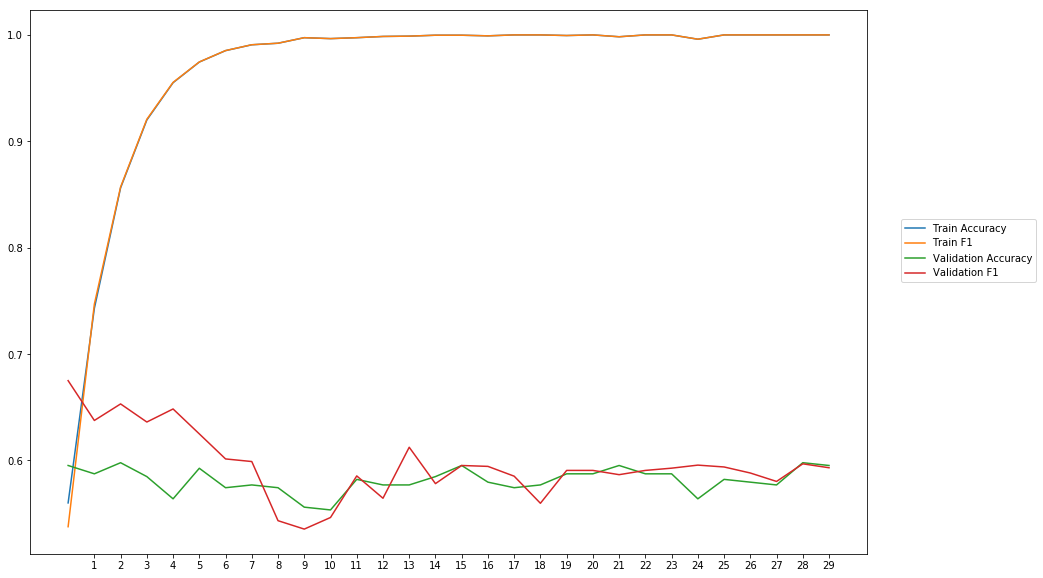

Average Accuracy: 58.15%
Average Precision: 57.79%
Average Recall: 62.08%
Average F1: 59.59%

-----Fold 6--------


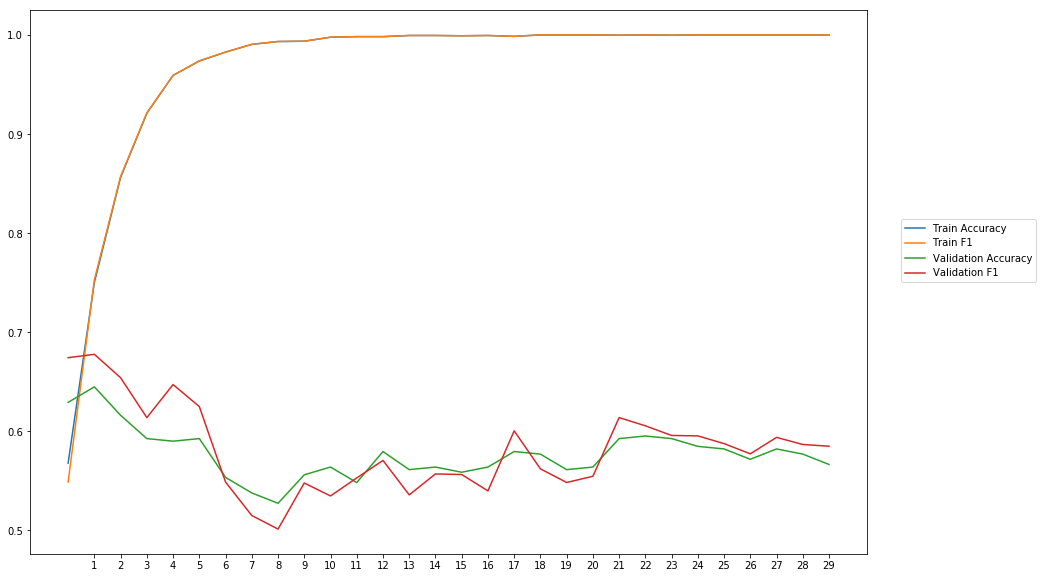

Average Accuracy: 57.69%
Average Precision: 57.47%
Average Recall: 59.31%
Average F1: 58.20%

-----Fold 7--------


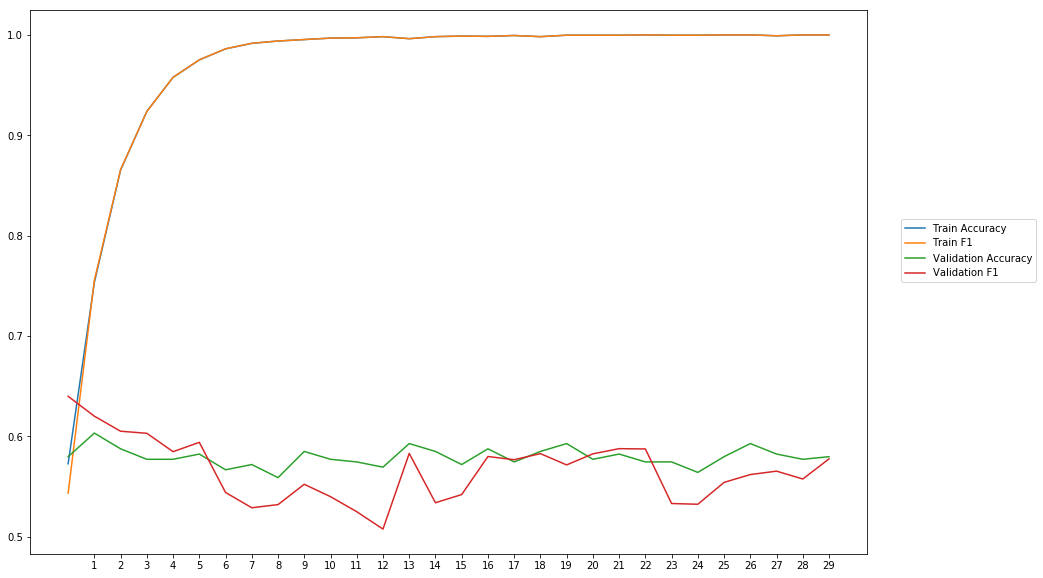

Average Accuracy: 57.94%
Average Precision: 58.65%
Average Recall: 55.14%
Average F1: 56.61%

-----Fold 8--------


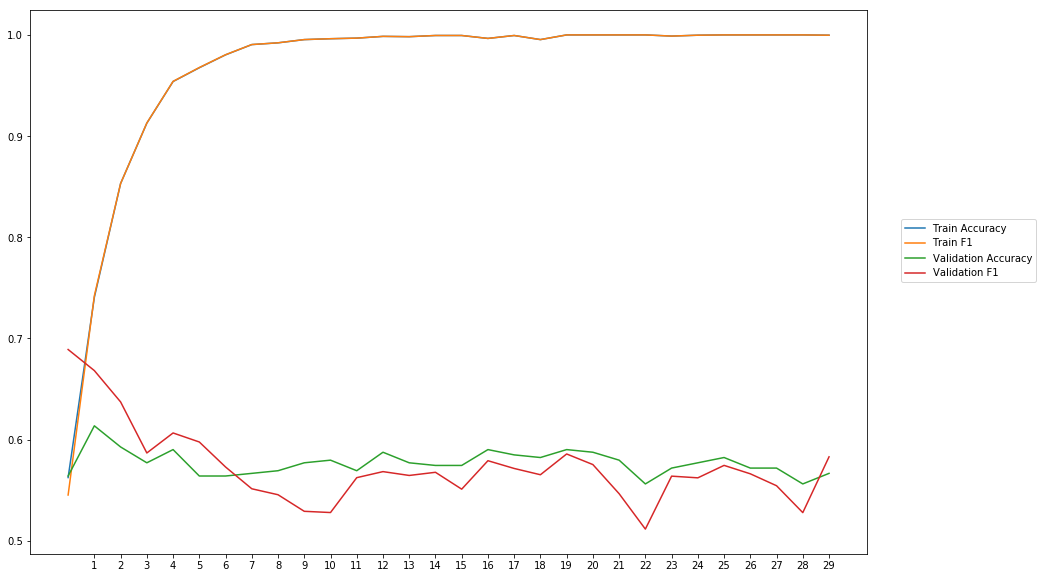

Average Accuracy: 57.69%
Average Precision: 58.04%
Average Recall: 57.41%
Average F1: 57.31%

-----Fold 9--------


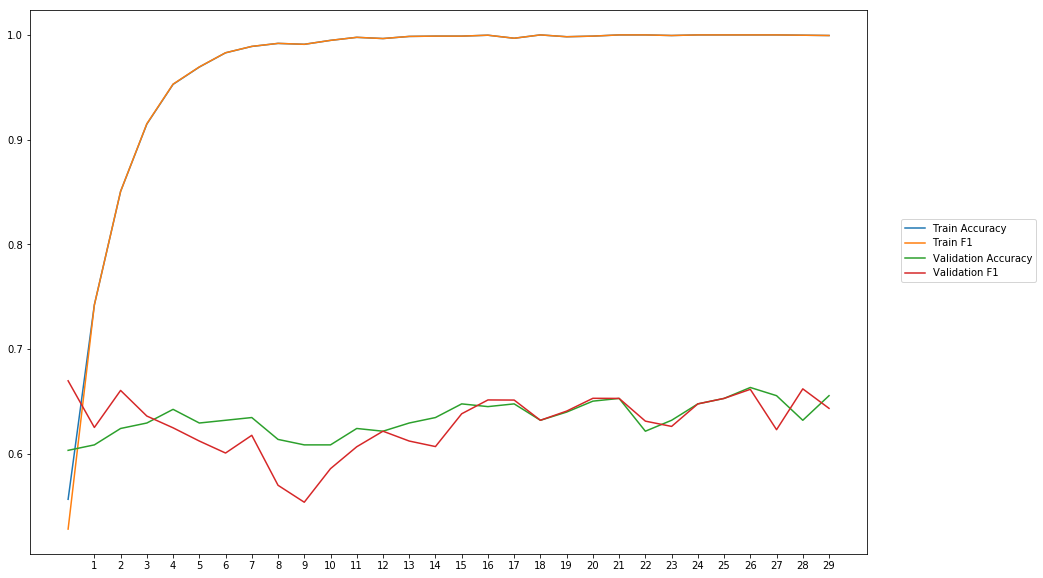

Average Accuracy: 63.39%
Average Precision: 64.04%
Average Recall: 62.24%
Average F1: 62.89%

-----Fold 10--------


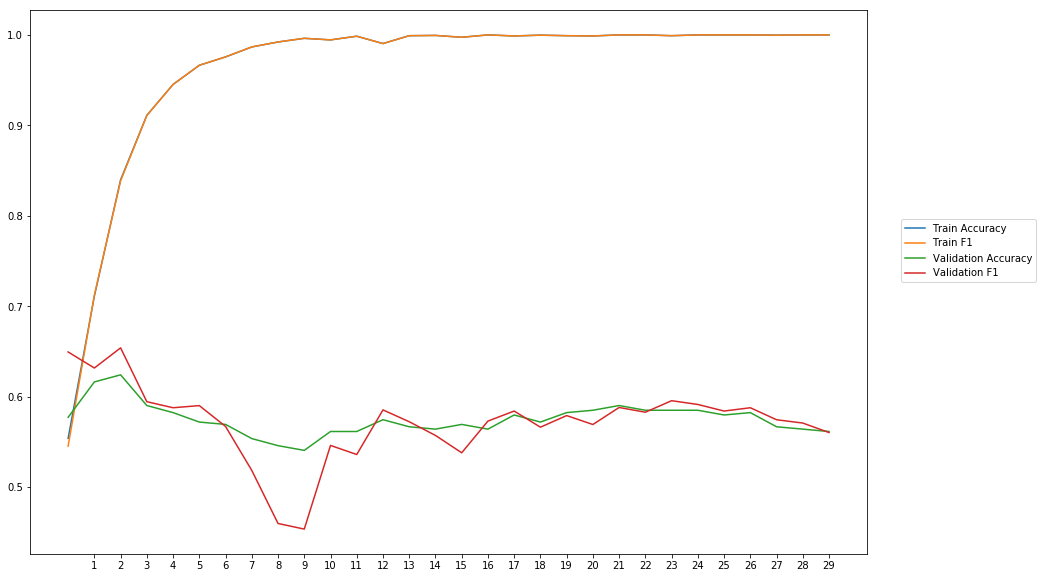

Average Accuracy: 57.49%
Average Precision: 57.66%
Average Recall: 57.12%
Average F1: 57.15%

-------Overallresults-------


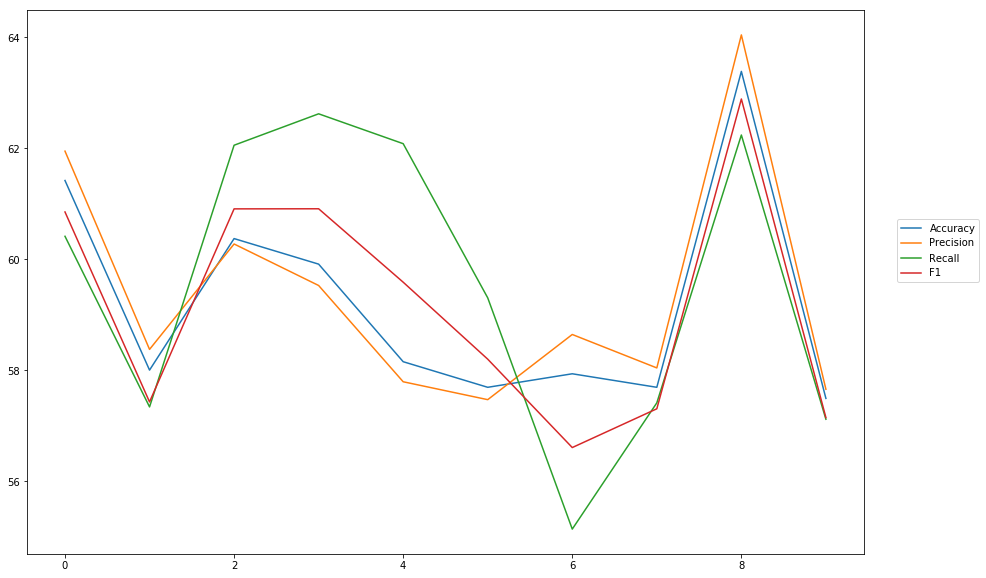

Accuracy: Mean = 59.21% (+/- 1.89%), Max = 63.39%, Min =  57.49%
Precision: Mean = 59.38% (+/- 2.04%), Max = 64.04%, Min =  57.47%
Recall: Mean = 59.57% (+/- 2.55%), Max = 62.62%, Min =  55.14%
F1: Mean = 59.18% (+/- 2.02%), Max = 62.89%, Min =  56.61%


In [29]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model8, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'gru_1_300_False')  

## Train and evaluate the best model with heldout testdata

Instructions for updating:
Use tf.cast instead.


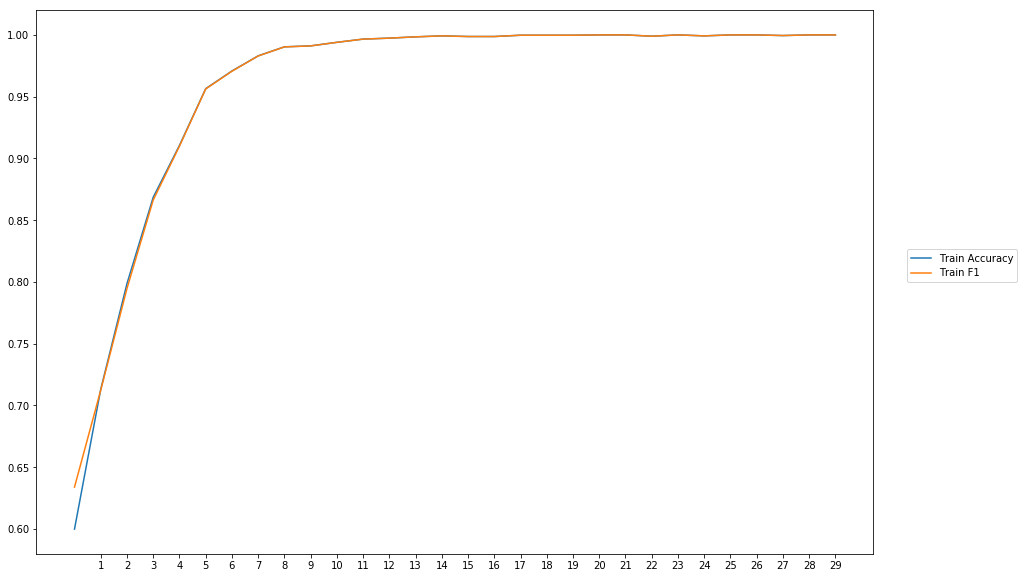


-----Test Scores----
Loss: 3.467190980911255
Accuracy: 64.79591836734694
Precision: 54.4529261947957
Recall: 68.81028936694203
F1: 60.7954495960183


In [11]:
#train, save and evaluate the model
train_evaluate_final_model(model1, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_AttentiveGRU')